<a href="https://colab.research.google.com/github/nemanja899/Bank-Marketing--Machine-Learning-problem/blob/master/BankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U imbalanced-learn

In [ ]:
pip install mlxtend

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
df=pd.read_csv("./drive/MyDrive/ColabNotebooks/Dataset/Banka/bank-additional.csv",sep=";")

In [ ]:
df.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   may         fri     487.0       2.0    999       0.0   
1  telephone   may         fri     346.0       4.0    999       0.0   
2  telephone   jun         wed     227.0       1.0    999       0.0   
3  telephone   jun         fri      17.0       3.0    999       0.0   
4   cellular   nov         mon      58.0       1.0    999       0.0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent          -1.8          92.893          -46.2      1.313   
1  nonexistent           1.1          93.994          -36.4      4.855   
2  nonexistent           1.4          94.465          -41.8      4.962   
3  nonexistent           1.4          94.465          -41.8      4.959   
4  nonexistent          -0.1          93.200          -42.0      4.191   

  nr.employed   y  
0      5099.1  no  
1        5191  no  
2      5228.1  no  
3      5228.1  no  
4      5195.8  no

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df

age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

        contact month day_of_week  duration  campaign  pdays  previous  \
0      cellular   may         fri     487.0       2.0    999       0.0   
1     telephone   may         fri     346.0       4.0    999       0.0   
2     telephone   jun         wed     227.0       1.0    999       0.0   
3     telephone   jun         fri      17.0       3.0    999       0.0   
4      cellular   nov         mon      58.0       1.0    999       0.0   
...         ...   ...         ...       ...       ...    ...       ...   
4114   cellular   jul         thu      53.0       1.0    999       0.0   
4115  telephone   jul         fri     219.0       1.0    999       0.0   
4116   cellular   may         mon      64.0       2.0    999       1.0   
4117   cellular   aug         fri     528.0       1.0    999       0.0   
4118   cellular   nov         wed     175.0       1.0    999       0.0   

         poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     nonexistent          -1.8          92.893          -46.2      1.313   
1     nonexistent           1.1          93.994          -36.4      4.855   
2     nonexistent           1.4          94.465          -41.8      4.962   
3     nonexistent           1.4          94.465          -41.8      4.959   
4     nonexistent          -0.1          93.200          -42.0      4.191   
...           ...           ...             ...            ...        ...   
4114  nonexistent           1.4          93.918          -42.7      4.958   
4115  nonexistent           1.4          93.918          -42.7      4.959   
4116      failure          -1.8          92.893          -46.2      1.354   
4117  nonexistent           1.4          93.444          -36.1      4.966   
4118  nonexistent          -0.1          93.200          -42.0      4.120   

     nr.employed   y  
0         5099.1  no  
1           5191  no  
2         5228.1  no  
3         5228.1  no  
4         5195.8  no  
...          ...  ..  
4114      5228.1  no  
4115      5228.1  no  
4116      5099.1  no  
4117      5228.1  no  
4118      5195.8  no  

[4119 rows x 21 columns]

In [ ]:
df.shape

(4119, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

In [ ]:
df.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4116.000000  4114.000000  4119.000000  4117.000000   
mean     40.113620   256.869048     2.534273   960.422190     0.190430   
std      10.313362   254.763913     2.566673   191.922786     0.541904   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.250000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  
count   4116.000000     4117.000000    4117.000000  4117.000000  
mean       0.084694       93.579540     -40.486358     4.858993  
std        1.563361        0.579442       4.639840    79.432456  
min       -3.400000       92.201000     -50.800000     0.635000  
25%       -1.800000       93.075000     -42.700000     1.334000  
50%        1.100000       93.749000     -41.800000     4.857000  
75%        1.400000       93.994000     -36.400000     4.961000  
max        1.400000       94.767000       1.266000  5099.100000

In [ ]:
pd.options.mode.use_inf_as_na = True
#Da se i prazan string racuna kao neodstajuca vrednost

In [ ]:
df.isna().sum()
#Prikaz nedostajucih vrednosti u datasetu

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 1
dtype: int64

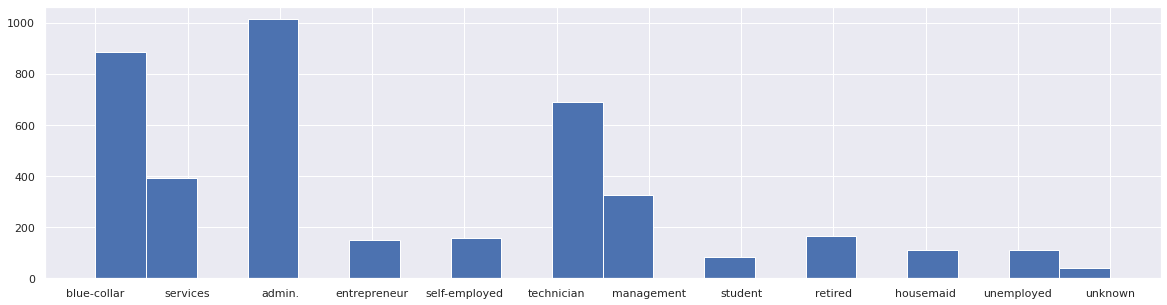

In [ ]:
df.job.hist(bins=20,figsize=(20,5))

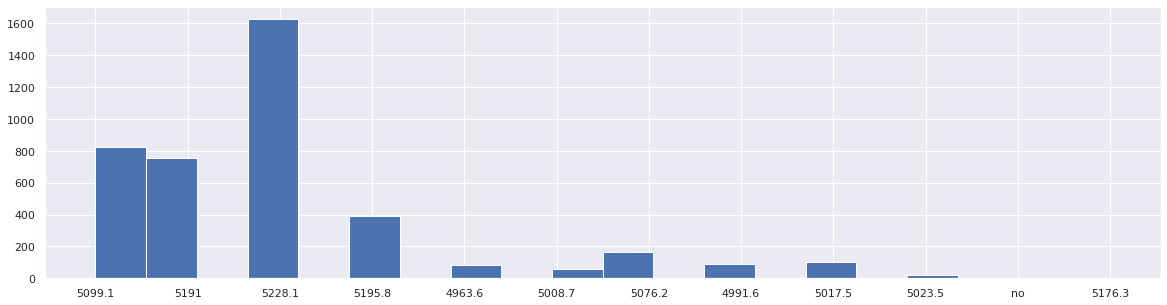

In [ ]:
df["nr.employed"].hist(bins=20,figsize=(20,5))

In [ ]:
df_job_empl=df.loc[:,["job","nr.employed"]]

In [ ]:
df_job_empl["job"].value_counts()
# Prikaz frekvencija atributa "job"  primecujemo da postoji unknown vrednost tj nepoznata i da ih ima 39

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [ ]:
jobs=df_job_empl.iloc[:,0].unique()
#jedinstveni poslovi

In [ ]:
empl=df_job_empl.iloc[:,1].unique()
#jedinstveno zaposlenje

In [ ]:
df_job_empl.iloc[:,1].value_counts()

5228.1    1625
5099.1     822
5191       758
5195.8     392
5076.2     164
5017.5     104
4991.6      87
4963.6      83
5008.7      60
5023.5      21
no           1
5176.3       1
Name: nr.employed, dtype: int64

In [ ]:
df_job_empl.loc[df_job_empl["job"]=="blue-collar"]

job nr.employed
0     blue-collar      5099.1
9     blue-collar        5191
13    blue-collar      5228.1
19    blue-collar      5228.1
27    blue-collar      5099.1
...           ...         ...
4090  blue-collar        5191
4092  blue-collar      5228.1
4094  blue-collar      5017.5
4097  blue-collar      5228.1
4102  blue-collar      5228.1

[884 rows x 2 columns]

In [ ]:
df_job_empl.head()

job nr.employed
0  blue-collar      5099.1
1     services        5191
2     services      5228.1
3     services      5228.1
4       admin.      5195.8

In [ ]:
def most_freq(column,str_array,df=None):
  """
  Funkcija za pronalazenje najcescih vrednosti
  column kolona
  str_array jedinstvene vrednosti koje se ponavljaju
  """
  jobs=[]
  for s in str_array:
     jobs.append(stats.mode(df.loc[df[column]==s]))
  return jobs
  #Funkcija za pronalazenje najcesce vrednosti

In [ ]:
jobs_freq=most_freq("job",jobs,df_job_empl)

In [ ]:
empl_freq=most_freq("nr.employed",empl,df_job_empl)

In [ ]:
empl_freq

[ModeResult(mode=array([['blue-collar', '5099.1']], dtype=object), count=array([[237, 822]])),
 ModeResult(mode=array([['blue-collar', '5191']], dtype=object), count=array([[203, 758]])),
 ModeResult(mode=array([['admin.', '5228.1']], dtype=object), count=array([[ 424, 1625]])),
 ModeResult(mode=array([['admin.', '5195.8']], dtype=object), count=array([[ 92, 392]])),
 ModeResult(mode=array([['admin.', '4963.6']], dtype=object), count=array([[23, 83]])),
 ModeResult(mode=array([['admin.', '5008.7']], dtype=object), count=array([[14, 60]])),
 ModeResult(mode=array([['admin.', '5076.2']], dtype=object), count=array([[ 52, 164]])),
 ModeResult(mode=array([['admin.', '4991.6']], dtype=object), count=array([[24, 87]])),
 ModeResult(mode=array([['admin.', '5017.5']], dtype=object), count=array([[ 33, 104]])),
 ModeResult(mode=array([], dtype=float64), count=array([], dtype=float64)),
 ModeResult(mode=array([['admin.', '5023.5']], dtype=object), count=array([[ 4, 21]])),
 ModeResult(mode=array

In [ ]:
jobs_freq=np.asarray(jobs_freq,dtype=object)
#Pretvaranje u np.array

In [ ]:
jobs_freq.shape

(12, 2, 1, 2)

In [ ]:
jobs_freq[:,0,0,0]
#experimentisanje kako da se prikaze odgovarajuci array

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [ ]:
empl_freq=np.asarray(empl_freq,dtype=object)
#Pretvaranje u np array zbog slicinga

In [ ]:
empl_freq.shape

(13, 2)

In [ ]:
print(empl_freq[:,0][9][0][1])
#nije se lepo pretvorilo u np.array pa sam rucno morao da prepravim tj da nadjem gde se greska javlja

IndexError: ignored

In [ ]:
def fill_na_jobs_freq (row):
  if(row["job"]=="unknown" or row["job"]==None or row["job"]==""):
    i=0
    while i<13:
      if(i!=9 and row["nr.employed"]==empl_freq[:,0][i][0][1]):
        row["job"]=empl_freq[:,0][i][0][0]
        break
      i+=1
  return row
    #Funkcija za popunjavanje nedostajuceg posla najcescim vrednostima

In [ ]:

def fill_na_empl_freq(row):
  if(row["nr.employed"]=="no" or row["nr.employed"]==None or row["nr.employed"]=="" or isinstance(row["nr.employed"],float)):
    i=0
    while i<len(jobs_freq[:,0,0,0]):
      if(jobs_freq[i,0,0,0]!=np.empty and row["job"]==jobs_freq[i,0,0,0]):
        row["nr.employed"]=jobs_freq[i,0,0,1]
        break
      i+=1
  return row


In [ ]:
df_job_empl.apply(fill_na_jobs_freq,axis="columns")

job nr.employed
0     blue-collar      5099.1
1        services        5191
2        services      5228.1
3        services      5228.1
4          admin.      5195.8
...           ...         ...
4114       admin.      5228.1
4115       admin.      5228.1
4116      student      5099.1
4117       admin.      5228.1
4118   management      5195.8

[4119 rows x 2 columns]

In [ ]:
df_job_empl.job.value_counts()

admin.           1036
blue-collar       899
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
Name: job, dtype: int64

In [ ]:
df_job_empl.apply(fill_na_empl_freq,axis=1)

job nr.employed
0     blue-collar      5099.1
1        services        5191
2        services      5228.1
3        services      5228.1
4          admin.      5195.8
...           ...         ...
4114       admin.      5228.1
4115       admin.      5228.1
4116      student      5099.1
4117       admin.      5228.1
4118   management      5195.8

[4119 rows x 2 columns]

In [ ]:
df_job_empl["nr.employed"].value_counts()

5228.1    1627
5099.1     822
5191       758
5195.8     392
5076.2     164
5017.5     104
4991.6      87
4963.6      83
5008.7      60
5023.5      21
5176.3       1
Name: nr.employed, dtype: int64

In [ ]:
df.update(df_job_empl)

In [ ]:
df.isna().sum()
#Nepoznate vrednosti iz atributa job su dopunjene najcescim kao i nr.employed

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       0
y                 1
dtype: int64

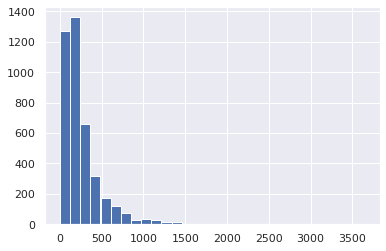

In [ ]:
df.duration.hist(bins=30)
#Nedostajuce vrednosti ne moraju da se popune za ovu varijablu jer ona ne ucestvuje u modelovanju 

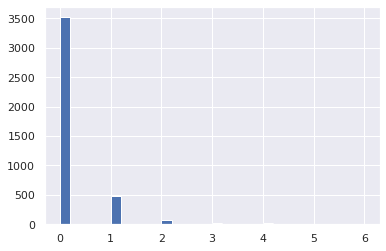

In [ ]:
df.previous.hist(bins=30)

In [ ]:
df.previous.value_counts()

0.0    3521
1.0     475
2.0      78
3.0      25
4.0      14
5.0       2
6.0       2
Name: previous, dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["poutcome_lbl"]=le.fit_transform(df.poutcome)
#Label enkoder ima 3 klase pa je mozda bolje da se koristi label encoder

In [ ]:
le.classes_

array(['failure', 'nonexistent', 'success'], dtype=object)

In [ ]:
le_job=preprocessing.LabelEncoder()
df["job_lbl"]=le_job.fit_transform(df.job)

In [ ]:
le_job.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'], dtype=object)

In [ ]:
def unknown_row(row):
 for col in df.columns:
   if(row[col]=="unknown" or row[col]=="Unknown"):
     row[col]=None
 return row
# Pretvaranje Unknown vrednosti iz kolona u Nedostajuce

In [ ]:
df=df.apply(unknown_row,axis=1)

In [ ]:
df.isna().sum()

age                 0
job                 0
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            3
campaign            5
pdays               0
previous            2
poutcome            0
emp.var.rate        3
cons.price.idx      2
cons.conf.idx       2
euribor3m           2
nr.employed         0
y                   1
poutcome_lbl        0
job_lbl             0
dtype: int64

In [ ]:
df.marital.value_counts()

married     2509
single      1153
divorced     446
Name: marital, dtype: int64

In [ ]:
df["marital_lbl"]=df.marital.map({"single":1,"divorced":2,"married":3})

In [ ]:
df.education.value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
illiterate                1
Name: education, dtype: int64

In [ ]:

df["education_lbl"]=df.education.replace({"illiterate":1,"basic.4y":2,"basic.6y":3,"basic.9y":4,"high.school":5,"professional.course":6,"university.degree":7})

In [ ]:
df.default.value_counts()

no     3315
yes       1
Name: default, dtype: int64

In [ ]:
df.default=df.default.map({"no":0,"yes":1})

In [ ]:
df.default=df.default.fillna("unknown")

In [ ]:
df.housing.value_counts()

yes    2175
no     1839
Name: housing, dtype: int64

In [ ]:
df.housing=df.housing.map({"no":0,"yes":1})

In [ ]:
df.loan.value_counts()

no     3349
yes     665
Name: loan, dtype: int64

In [ ]:
df.loan=df.loan.map({"no":0,"yes":1})

In [ ]:
df.contact.value_counts()

cellular     2652
telephone    1467
Name: contact, dtype: int64

In [ ]:
df.contact=df.contact.fillna("unknown")

In [ ]:
df.y=df.y.map({"no":0,"yes":1})

In [ ]:
df.poutcome.value_counts()
#mnogo nedostajucih vrednosti

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

impute_knn = KNNImputer(n_neighbors=3)
imp=impute_knn.fit_transform(df.loc[:,["pdays","previous","poutcome_lbl"]])
#Ubacivanje nedostajucih vrednosti KNN algoritmom

In [ ]:
df.previous=imp[:,1]

In [ ]:
df.isna().sum()

age                 0
job                 0
marital            11
education         167
default             0
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            3
campaign            5
pdays               0
previous            0
poutcome            0
emp.var.rate        3
cons.price.idx      2
cons.conf.idx       2
euribor3m           2
nr.employed         0
y                   1
poutcome_lbl        0
job_lbl             0
marital_lbl        11
education_lbl     167
dtype: int64

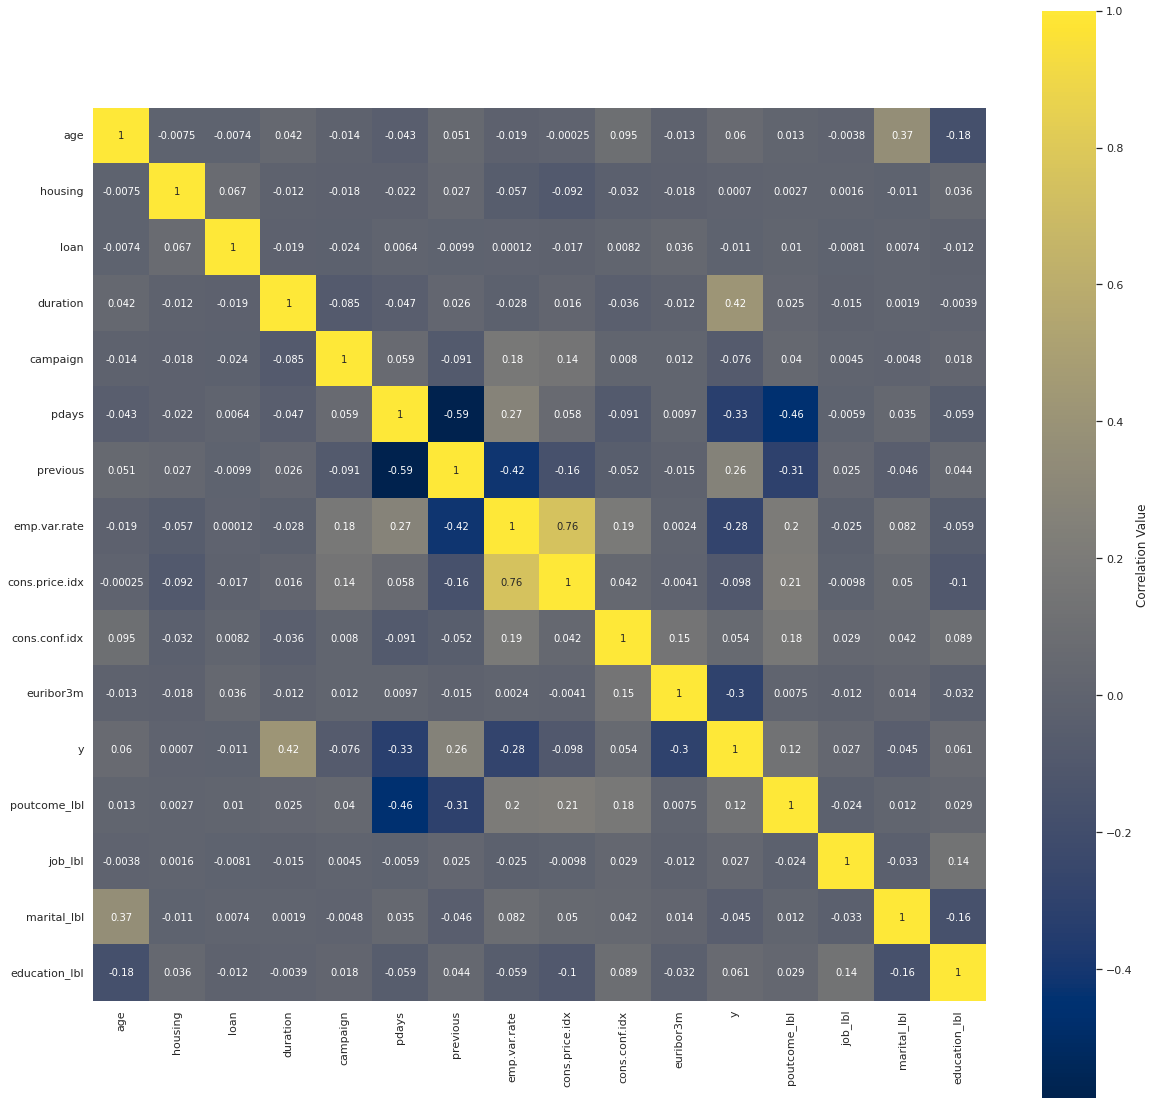

In [ ]:
corrmat = df.corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat,cmap = "cividis",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'vertical'});

In [ ]:
imp_camp=impute_knn.fit_transform(df.loc[:,["duration","previous","emp.var.rate","cons.price.idx","campaign"]])
df.campaign=imp_camp[:,-1]
df.campaign=df.campaign.map(lambda x:round(x,0))

In [ ]:
imp_martial=impute_knn.fit_transform(df.loc[:,["age","education_lbl","emp.var.rate","marital_lbl"]])

In [ ]:
df.marital_lbl=imp_martial[:,-1]
df.marital_lbl=df.marital_lbl.map(lambda x:round(x,0))

In [ ]:
imp_education=impute_knn.fit_transform(df.loc[:,["marital_lbl","job_lbl","emp.var.rate","age","education_lbl"]])
df.education_lbl=imp_education[:,-1]
df.education_lbl=df.education_lbl.map(lambda x:round(x,0))

In [ ]:
imp_housing=impute_knn.fit_transform(df.loc[:,["loan","emp.var.rate","housing"]])
df.housing=imp_housing[:,-1]
df.housing=df.housing.map(lambda x:round(x,0))
imp_loan=impute_knn.fit_transform(df.loc[:,["housing","pdays","euribor3m","loan"]])
df.loan=imp_loan[:,-1]
df.loan=df.loan.map(lambda x:round(x,0))

In [ ]:
df.isna().sum()

age                 0
job                 0
marital            11
education         167
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            3
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        3
cons.price.idx      2
cons.conf.idx       2
euribor3m           2
nr.employed         0
y                   1
poutcome_lbl        0
job_lbl             0
marital_lbl         0
education_lbl       0
dtype: int64

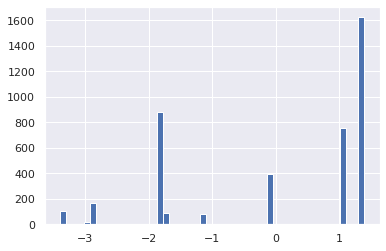

In [ ]:
df["emp.var.rate"].hist(bins=50)

In [ ]:
df["emp.var.rate"].describe()

count    4116.000000
mean        0.084694
std         1.563361
min        -3.400000
25%        -1.800000
50%         1.100000
75%         1.400000
max         1.400000
Name: emp.var.rate, dtype: float64

In [ ]:
imp_emp_var_rate=impute_knn.fit_transform(df.loc[:,["campaign","pdays","previous","cons.price.idx","y","emp.var.rate"]])
df["emp.var.rate"]=imp_emp_var_rate[:,-1]
df["emp.var.rate"]=df["emp.var.rate"].map(lambda x:round(x,3))

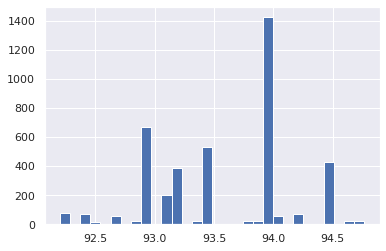

In [ ]:
df["cons.price.idx"].hist(bins=30)

In [ ]:
df["cons.price.idx"].describe()

count    4117.000000
mean       93.579540
std         0.579442
min        92.201000
25%        93.075000
50%        93.749000
75%        93.994000
max        94.767000
Name: cons.price.idx, dtype: float64

In [ ]:
imp_cons_price_idx=impute_knn.fit_transform(df.loc[:,["previous","emp.var.rate","y","cons.price.idx"]])
df["cons.price.idx"]=imp_cons_price_idx[:,-1]
df["cons.price.idx"]=df["cons.price.idx"].map(lambda x:round(x,3))

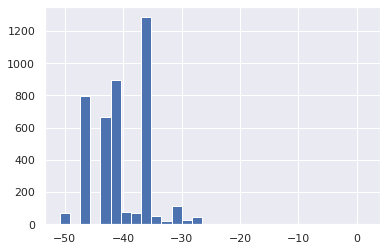

In [ ]:
df["cons.conf.idx"].hist(bins=30)

In [ ]:
df["cons.conf.idx"].describe()

count    4117.000000
mean      -40.486358
std         4.639840
min       -50.800000
25%       -42.700000
50%       -41.800000
75%       -36.400000
max         1.266000
Name: cons.conf.idx, dtype: float64

In [ ]:
imp_cons_conf_idx=impute_knn.fit_transform(df.loc[:,["emp.var.rate","euribor3m","poutcome_lbl","cons.conf.idx"]])
df["cons.conf.idx"]=imp_cons_conf_idx[:,-1]
df["cons.conf.idx"]=df["cons.conf.idx"].map(lambda x:round(x,3))

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_num=df.select_dtypes(include=["number"])

In [ ]:
df_num=df_num.dropna()

In [ ]:
df_num.isna().sum()

age               0
housing           0
loan              0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
poutcome_lbl      0
job_lbl           0
marital_lbl       0
education_lbl     0
dtype: int64

In [ ]:
df_num=df_num.drop(columns="poutcome_lbl")

In [ ]:
df_num=df_num.drop(columns="duration")

In [ ]:
ycorr = df_num.corr()["y"]
ycorr = pd.DataFrame(ycorr)
ycorr.sort_values(by="y",ascending=False)
#koliko korelise izlaz u odnosu na druge varijable

y
y               1.000000
previous        0.255563
age             0.060343
education_lbl   0.055789
cons.conf.idx   0.054617
job_lbl         0.026973
housing         0.003587
loan           -0.010171
marital_lbl    -0.045587
campaign       -0.075750
cons.price.idx -0.098362
emp.var.rate   -0.283278
euribor3m      -0.298559
pdays          -0.331948

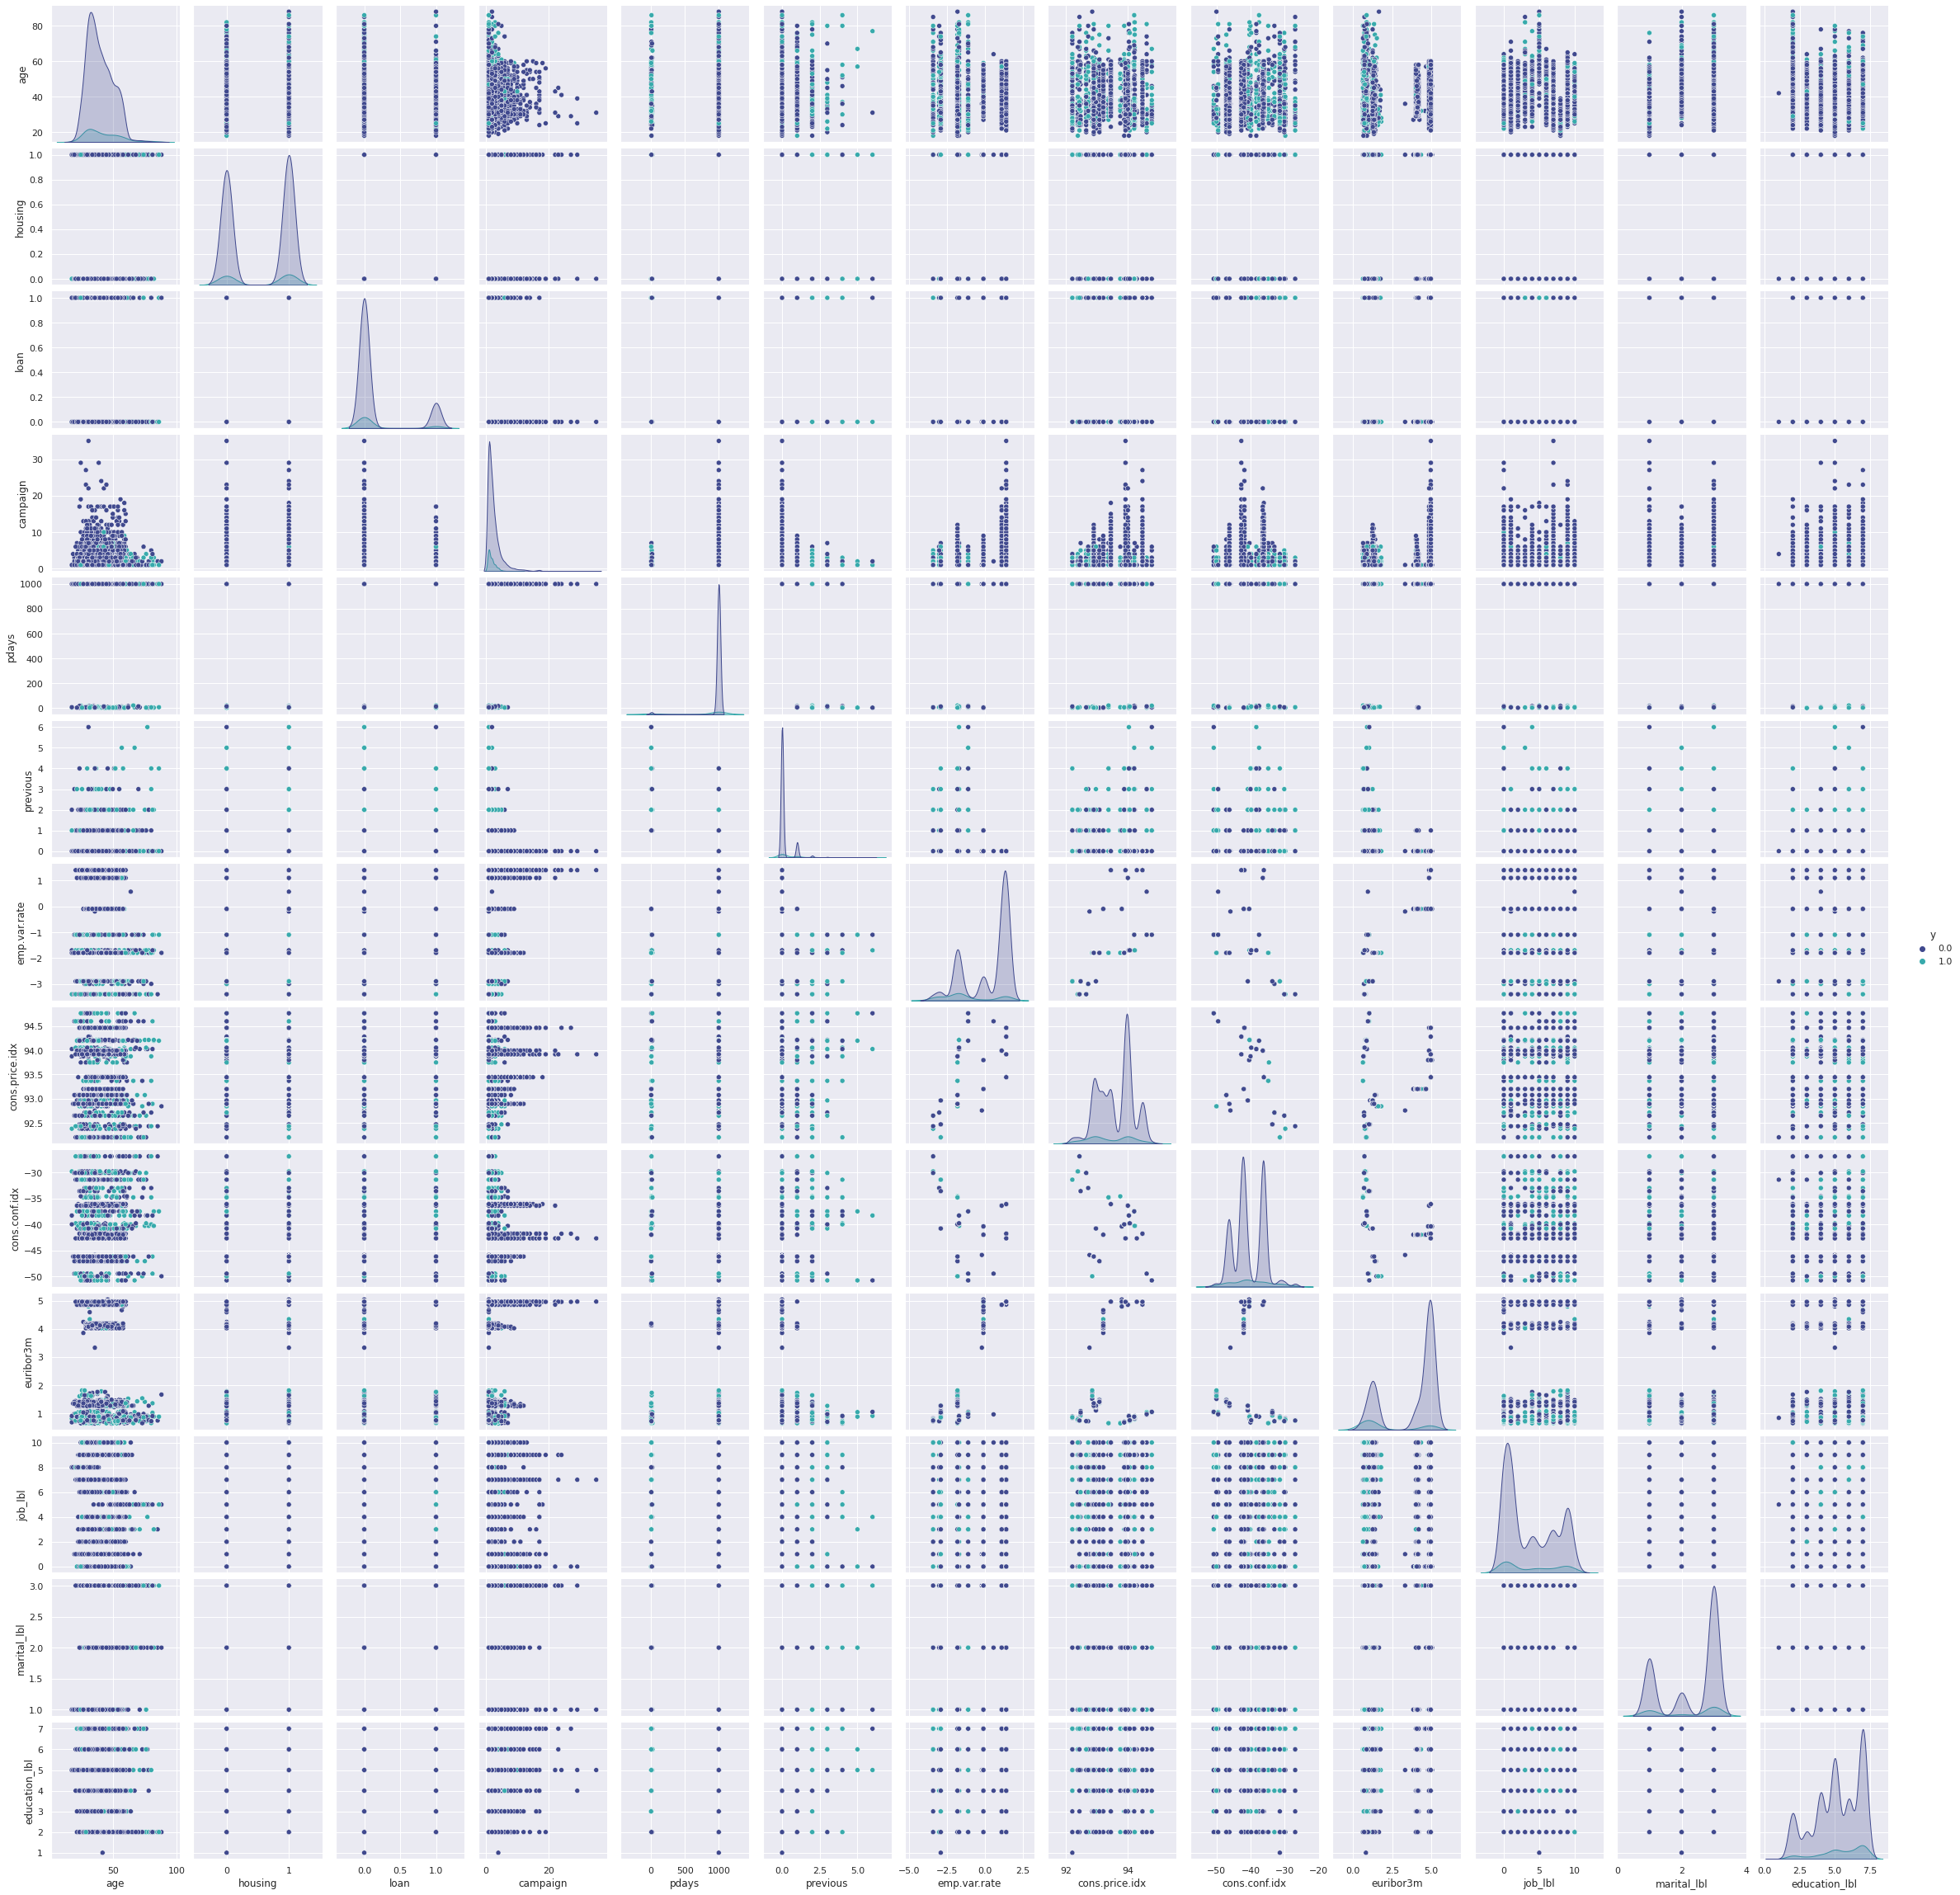

In [ ]:
sns.pairplot(data=df_num,hue="y", palette = "mako")

In [ ]:
from locale import normalize
df_num["y"].value_counts(normalize=True)
#89% osoba nije sub a samo 11% jeste

0.0    0.890348
1.0    0.109652
Name: y, dtype: float64

In [ ]:
df_num["y"].value_counts()

0.0    3662
1.0     451
Name: y, dtype: int64

Text(0.5, 1.0, 'Distribucija ostvarenih kontakta u odnosu na uspeh kampanje')

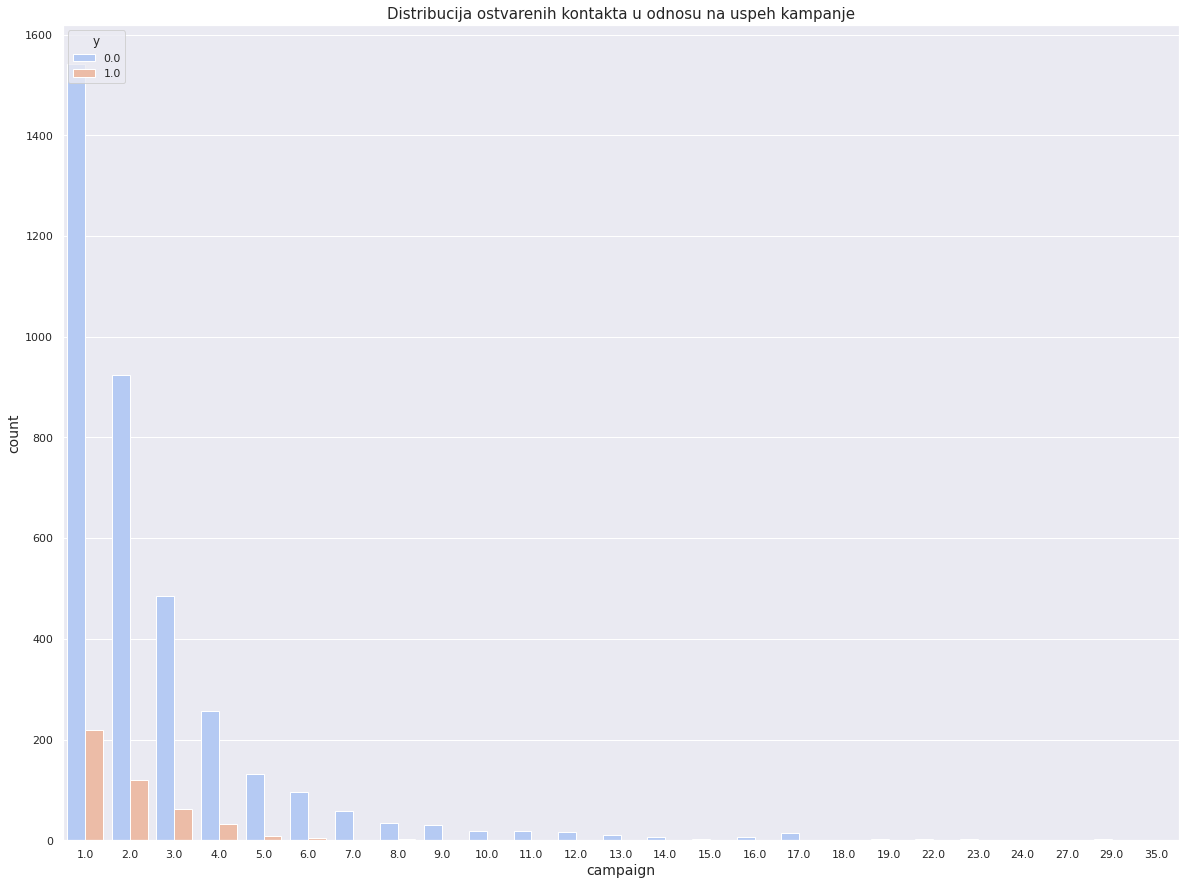

In [ ]:
plt.figure(figsize = (20, 15))
plt.xlabel("Ostvareni kontakti", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
camp = sns.countplot(x = df_num["campaign"], hue = df_num["y"], palette = "coolwarm")
camp.set_title("Distribucija ostvarenih kontakta u odnosu na uspeh kampanje", fontsize = 15)

In [ ]:
df_num.education_lbl=df_num.education_lbl.map({1:"illiterate",2:"basic.4y",3:"basic.6y",4:"basic.9y",5:"high.school",6:"professional.course",7:"university.degree"})

In [ ]:
df_num.education_lbl.value_counts()

university.degree      1276
high.school             963
basic.9y                611
professional.course     578
basic.4y                433
basic.6y                251
illiterate                1
Name: education_lbl, dtype: int64

In [ ]:
df_num

age  housing  loan  campaign  pdays  previous  emp.var.rate  \
0      30      1.0   0.0       2.0    999       0.0          -1.8   
1      39      0.0   0.0       4.0    999       0.0           1.1   
2      25      1.0   0.0       1.0    999       0.0           1.4   
3      38      0.0   0.0       3.0    999       0.0           1.4   
4      47      1.0   0.0       1.0    999       0.0          -0.1   
...   ...      ...   ...       ...    ...       ...           ...   
4114   30      1.0   1.0       1.0    999       0.0           1.4   
4115   39      1.0   0.0       1.0    999       0.0           1.4   
4116   27      0.0   0.0       2.0    999       1.0          -1.8   
4117   58      0.0   0.0       1.0    999       0.0           1.4   
4118   34      1.0   0.0       1.0    999       0.0          -0.1   

      cons.price.idx  cons.conf.idx  euribor3m    y  job_lbl  marital_lbl  \
0             92.893          -46.2      1.313  0.0        1          3.0   
1             93.994          -36.4      4.855  0.0        7          1.0   
2             94.465          -41.8      4.962  0.0        7          3.0   
3             94.465          -41.8      4.959  0.0        7          3.0   
4             93.200          -42.0      4.191  0.0        0          3.0   
...              ...            ...        ...  ...      ...          ...   
4114          93.918          -42.7      4.958  0.0        0          3.0   
4115          93.918          -42.7      4.959  0.0        0          3.0   
4116          92.893          -46.2      1.354  0.0        8          1.0   
4117          93.444          -36.1      4.966  0.0        0          3.0   
4118          93.200          -42.0      4.120  0.0        4          1.0   

          education_lbl  
0              basic.9y  
1           high.school  
2           high.school  
3              basic.9y  
4     university.degree  
...                 ...  
4114           basic.6y  
4115        high.school  
4116        high.school  
4117        high.school  
4118        high.school  

[4113 rows x 14 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
#enc_edu=pd.DataFrame(enc.fit_transform(df_num[["education_lbl"]]).toarray())
enc_edu=enc.fit(df_num.loc[:,["education_lbl"]])

In [ ]:
edu=enc_edu.categories_[0]

In [ ]:
enc_edu_df=pd.DataFrame(enc_edu.transform(df_num.loc[:,["education_lbl"]]).toarray(),columns=edu)

In [ ]:
df_num= df_num.join(enc_edu_df)

In [ ]:
df_num=df_num.dropna()

In [ ]:
df_num=df_num.drop(columns=["education_lbl"])

In [ ]:
df_num["marital"]=df_num.marital_lbl.map({1:"single",2:"divorced",3:"married"})

In [ ]:
enc_mar=enc.fit(df_num.loc[:,["marital"]])
mar=enc_mar.categories_[0]
enc_mar_df=pd.DataFrame(enc_edu.transform(df_num.loc[:,["marital"]]).toarray(),columns=mar)
df_num= df_num.join(enc_mar_df)

In [ ]:
df_num=df_num.dropna()

In [ ]:
df_num["total_contacts"]=df_num.previous+df_num.campaign

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#df_num=df_num.drop(columns="marital")
df_num=df_num.drop(columns="marital")

In [ ]:
df_num=df_num.drop(columns="marital_lbl")

In [ ]:
df_num["job_lbl"]=le_job.inverse_transform(df_num["job_lbl"])

In [ ]:
enc_job=enc.fit(df_num.loc[:,["job_lbl"]])
job=enc_job.categories_[0]
enc_job_df=pd.DataFrame(enc_job.transform(df_num.loc[:,["job_lbl"]]).toarray(),columns=job)
df_num=df_num.join(enc_job_df)

In [ ]:
df_num=df_num.drop(columns="job_lbl")

In [ ]:
df_num=df_num.dropna()

In [ ]:
df_num

age  housing  loan  campaign  pdays  previous  emp.var.rate  \
0      30      1.0   0.0       2.0    999       0.0          -1.8   
1      39      0.0   0.0       4.0    999       0.0           1.1   
2      25      1.0   0.0       1.0    999       0.0           1.4   
3      38      0.0   0.0       3.0    999       0.0           1.4   
4      47      1.0   0.0       1.0    999       0.0          -0.1   
...   ...      ...   ...       ...    ...       ...           ...   
4096   33      0.0   0.0       2.0    999       0.0           1.1   
4097   41      0.0   0.0       1.0    999       0.0           1.4   
4098   34      1.0   0.0       3.0    999       0.0           1.4   
4099   58      0.0   0.0       1.0    999       0.0           1.4   
4100   41      0.0   0.0       1.0    999       0.0          -1.8   

      cons.price.idx  cons.conf.idx  euribor3m    y  basic.4y  basic.6y  \
0             92.893          -46.2      1.313  0.0       0.0       0.0   
1             93.994          -36.4      4.855  0.0       0.0       0.0   
2             94.465          -41.8      4.962  0.0       0.0       0.0   
3             94.465          -41.8      4.959  0.0       0.0       0.0   
4             93.200          -42.0      4.191  0.0       0.0       0.0   
...              ...            ...        ...  ...       ...       ...   
4096          93.994          -36.4      4.857  0.0       0.0       0.0   
4097          93.444          -36.1      4.963  0.0       0.0       0.0   
4098          93.444          -36.1      4.963  0.0       0.0       0.0   
4099          93.444          -36.1      4.963  0.0       1.0       0.0   
4100          93.075          -47.1      1.405  0.0       0.0       0.0   

      basic.9y  high.school  illiterate  professional.course  \
0          1.0          0.0         0.0                  0.0   
1          0.0          1.0         0.0                  0.0   
2          0.0          1.0         0.0                  0.0   
3          1.0          0.0         0.0                  0.0   
4          0.0          0.0         0.0                  0.0   
...        ...          ...         ...                  ...   
4096       1.0          0.0         0.0                  0.0   
4097       0.0          1.0         0.0                  0.0   
4098       0.0          0.0         0.0                  1.0   
4099       0.0          0.0         0.0                  0.0   
4100       1.0          0.0         0.0                  0.0   

      university.degree  divorced  married  single  total_contacts  admin.  \
0                   0.0       0.0      1.0     0.0             2.0     0.0   
1                   0.0       0.0      0.0     1.0             4.0     0.0   
2                   0.0       0.0      1.0     0.0             1.0     0.0   
3                   0.0       0.0      1.0     0.0             3.0     0.0   
4                   1.0       0.0      1.0     0.0             1.0     1.0   
...                 ...       ...      ...     ...             ...     ...   
4096                0.0       0.0      0.0     1.0             2.0     0.0   
4097                0.0       0.0      1.0     0.0             1.0     0.0   
4098                0.0       1.0      0.0     0.0             3.0     0.0   
4099                0.0       0.0      1.0     0.0             1.0     0.0   
4100                0.0       1.0      0.0     0.0             1.0     0.0   

      blue-collar  entrepreneur  housemaid  management  retired  \
0             1.0           0.0        0.0         0.0      0.0   
1             0.0           0.0        0.0         0.0      0.0   
2             0.0           0.0        0.0         0.0      0.0   
3             0.0           0.0        0.0         0.0      0.0   
4             0.0           0.0        0.0         0.0      0.0   
...           ...           ...        ...         ...      ...   
4096          1.0           0.0        0.0         0.0      0.0   
4097          0.0           0.0   

In [ ]:
ykor = df_num.corr()["y"]
ykor = pd.DataFrame(ykor)
ykor.sort_values(by="y",ascending=False)
#koliko korelise izlaz u odnosu na druge varijable

y
y                    1.000000
previous             0.255606
age                  0.060363
cons.conf.idx        0.054834
basic.6y             0.032099
blue-collar          0.022224
high.school          0.016064
professional.course  0.014467
divorced             0.011359
entrepreneur         0.007105
housemaid            0.004824
housing              0.003842
technician           0.002561
married              0.001239
unemployed          -0.001080
self-employed       -0.002065
basic.4y            -0.003731
management          -0.004553
retired             -0.004650
illiterate          -0.005498
admin.              -0.007392
services            -0.008412
single              -0.009249
loan                -0.010174
university.degree   -0.017010
total_contacts      -0.021913
student             -0.027567
basic.9y            -0.029101
campaign            -0.076044
cons.price.idx      -0.098748
emp.var.rate        -0.283889
euribor3m           -0.299154
pdays               -0.331757

In [ ]:
def rm_out(df):
  for col in df.columns:
    q_low = df[col].quantile(0.25)
    q_hi  = df[col].quantile(0.75)
    iqr=q_hi-q_low
    df_out= df.loc[(df[col] <= q_hi+(1.5*iqr)) & (df[col] >= q_low-(1.5*iqr))]
  return df_out
  #izbacivanje outlajera

In [ ]:
df_out=rm_out(df_num.loc[:, ~df_num.columns.isin(['pdays',"previous"])])

In [ ]:
X=df_out.loc[:, ~df_out.columns.isin(["y"])]
Y=df_out.loc[:,"y"]

In [ ]:
!pip install boruta


In [ ]:
X.columns

Index(['age', 'housing', 'loan', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course', 'university.degree',
       'divorced', 'married', 'single', 'total_contacts', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed'],
      dtype='object')

In [ ]:
X.shape

(3984, 30)

Podela Dataseta na Train i Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.3, random_state = 79, stratify = Y)

Kreiranje Oversamplovanog dataseta pomocu SMOT-e medote

In [ ]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

smt=SMOTE(sampling_strategy='minority')
X_sm_train,Y_sm_train=smt.fit_resample(X_train,Y_train)

In [ ]:
Y_sm_train.value_counts()

0.0    2481
1.0    2481
Name: y, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=42)
X_res, Y_res = rus.fit_resample(X_train, Y_train)

In [ ]:
Y_res.value_counts()

0.0    307
1.0    307
Name: y, dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
ada= ADASYN(random_state=69)
X_ada,Y_ada= ada.fit_resample(X_train,Y_train)

In [ ]:
Y_ada.value_counts()

1.0    2547
0.0    2481
Name: y, dtype: int64

In [ ]:
from imblearn.combine import SMOTETomek
smtom=SMOTETomek(random_state=69)
X_smtom,Y_smtom=smtom.fit_resample(X_train,Y_train)

In [ ]:
Y_smtom.value_counts()

0.0    2469
1.0    2469
Name: y, dtype: int64

In [ ]:
from imblearn.combine import SMOTEENN
smteen=SMOTEENN(random_state=69)
X_smteen,Y_smteen=smteen.fit_resample(X_train,Y_train)

In [ ]:
Y_smteen.value_counts()

1.0    2378
0.0    1411
Name: y, dtype: int64

Velicina Originalne target Varijable pre Oversamplinga

In [ ]:
Y_train.value_counts()

0.0    2481
1.0     307
Name: y, dtype: int64

In [ ]:
X_sm_train.tail()

age   housing      loan  campaign  emp.var.rate  cons.price.idx  \
4957   67  0.890147  0.109853  1.890147     -3.224236       92.534042   
4958   26  0.000000  0.000000  2.092413      1.400000       93.968550   
4959   26  0.000000  0.000000  1.426663     -1.700000       94.067106   
4960   36  0.691488  0.691488  3.000000      1.400000       94.465000   
4961   54  1.000000  0.442398  1.000000     -2.955760       92.486492   

      cons.conf.idx  euribor3m  basic.4y  basic.6y  basic.9y  high.school  \
4957     -27.767836   0.719981       0.0  0.109853  0.000000     0.890147   
4958     -42.616828   4.951221       0.0  0.000000  0.000000     0.907587   
4959     -38.726663   0.879680       0.0  0.000000  0.000000     0.000000   
4960     -41.800000   4.956234       0.0  0.000000  0.691488     0.000000   
4961     -32.292164   0.777627       0.0  0.557602  0.000000     0.442398   

      illiterate  professional.course  university.degree  divorced   married  \
4957         0.0                  0.0           0.000000       0.0  1.000000   
4958         0.0                  0.0           0.092413       0.0  0.000000   
4959         0.0                  0.0           1.000000       0.0  1.000000   
4960         0.0                  0.0           0.308512       0.0  1.000000   
4961         0.0                  0.0           0.000000       0.0  0.557602   

        single  total_contacts    admin.  blue-collar  entrepreneur  \
4957  0.000000        2.109853  0.000000     0.000000           0.0   
4958  1.000000        2.092413  0.907587     0.000000           0.0   
4959  0.000000        2.213332  1.000000     0.000000           0.0   
4960  0.000000        3.000000  0.000000     0.691488           0.0   
4961  0.442398        1.442398  0.442398     0.000000           0.0   

      housemaid  management   retired  self-employed  services  student  \
4957   0.109853    0.000000  0.000000       0.000000       0.0      0.0   
4958   0.000000    0.000000  0.000000       0.092413       0.0      0.0   
4959   0.000000    0.000000  0.000000       0.000000       0.0      0.0   
4960   0.000000    0.000000  0.308512       0.000000       0.0      0.0   
4961   0.000000    0.557602  0.000000       0.000000       0.0      0.0   

      technician  unemployed  
4957    0.890147         0.0  
4958    0.000000         0.0  
4959    0.000000         0.0  
4960    0.000000         0.0  
4961    0.000000         0.0

Mozemo primetiti da nove vrednosti nisu zaokruzene koje su se dodale prilikom Oversamplinga . Pravimo funkciju koja ce nakon kolone euribor3m zaokruziti vrednosti ostalih kolona.

In [ ]:
def round_df(row):
  flag=0
  for col in X_sm_train.columns:
    if ((col=="euribor3m" or flag==1) and col!="price/conf"):
      if(col=="euribor3m"):
        flag=1
        continue
      row[col]=round(row[col],0)
  return row
      


In [ ]:
X_test["price/conf"]=X_test["cons.price.idx"]/X_test["cons.conf.idx"]
X_sm_train["price/conf"]=X_sm_train["cons.price.idx"]/X_sm_train["cons.conf.idx"]
X_train["price/conf"]=X_train["cons.price.idx"]/X_train["cons.conf.idx"]
X_ada["price/conf"]=X_ada["cons.price.idx"]/X_ada["cons.conf.idx"]
X_smtom["price/conf"]=X_smtom["cons.price.idx"]/X_smtom["cons.conf.idx"]
X_smteen["price/conf"]=X_smteen["cons.price.idx"]/X_smteen["cons.conf.idx"]

In [ ]:
X_sm_train=X_sm_train.apply(round_df,axis=1)
X_ada=X_ada.apply(round_df,axis=1)
X_smtom=X_smtom.apply(round_df,axis=1)
X_smteen=X_smteen.apply(round_df,axis=1)

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 7,
   min_samples_leaf=10
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 1000 # number of trials to perform
)
#fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_smteen), np.array(Y_smteen))

green_area = X_smtom.columns[boruta.support_].to_list()
blue_area = X_smtom.columns[boruta.support_weak_].to_list()

print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['age', 'housing', 'loan', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'total_contacts', 'price/conf']
features in the blue area: []


In [ ]:
rank=pd.Series(boruta.ranking_,name="rank",index=X_smtom.columns)

In [ ]:
rank=rank.sort_values()
rank

age                     1
total_contacts          1
euribor3m               1
cons.conf.idx           1
cons.price.idx          1
price/conf              1
campaign                1
emp.var.rate            1
housing                 1
loan                    1
blue-collar             2
basic.9y                3
admin.                  4
single                  4
married                 6
technician              7
professional.course     7
divorced                9
university.degree      10
high.school            11
services               12
basic.4y               14
housemaid              14
basic.6y               14
student                16
self-employed          17
management             18
entrepreneur           19
retired                19
illiterate             21
unemployed             21
Name: rank, dtype: int64

*   SMOTE oversamling daje kao rank 2-basic.9y3-university.degree, 4-single
*   ADASYN daje kao rank 2-basic.9y,3-blue-collar,4-prof-courese
*   RandomUndersampling rank 2-campaign,3-total-contacts,4-housing
*   SMOTETomek rank 2-blue-collar,3-single, 4-university.degree
*   SMOTEENN rank 3-basic.9y,2- blue-collar , 4-admin. , single





In [ ]:
ykor = X_sm_train.join(Y_sm_train).corr()["y"]
ykor = pd.DataFrame(ykor)
ykor.sort_values(by="y",ascending=False)
#koliko korelise izlaz u odnosu na druge varijable

y
y                    1.000000
high.school          0.056430
cons.conf.idx        0.050732
age                  0.049427
professional.course  0.043205
single               0.025589
blue-collar          0.021447
basic.6y             0.018682
services             0.015358
housemaid            0.011847
housing              0.010018
technician           0.006912
entrepreneur         0.001093
loan                -0.000878
married             -0.004118
admin.              -0.006436
retired             -0.010556
self-employed       -0.011641
illiterate          -0.014198
management          -0.014246
basic.4y            -0.027139
divorced            -0.032136
university.degree   -0.034360
total_contacts      -0.059544
basic.9y            -0.060211
student             -0.067871
price/conf          -0.078554
cons.price.idx      -0.138889
campaign            -0.149864
emp.var.rate        -0.394591
euribor3m           -0.422313
unemployed                NaN

In [ ]:
col=green_area+blue_area+["blue-collar","basic.9y"]

In [ ]:
col=[c for c in col] #if c!="total_contacts" and c!="price/conf"]

In [ ]:
col

['age',
 'housing',
 'loan',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'total_contacts',
 'price/conf',
 'blue-collar',
 'basic.9y']

In [ ]:
X_sm_train=X_sm_train.loc[:,col]
X_ada=X_ada.loc[:,col]
#X_res=X_res.loc[:,col]
X_smtom=X_smtom.loc[:,col]
X_smteen=X_smteen.loc[:,col]
X_train=X_train.loc[:,col]

In [ ]:
X_test=X_test.loc[:,col]

In [ ]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_std_train=scaler.transform(X_train)

Kolika je tacnost modela **Logisticke regresije** ako **ne** radimo neku vrstu **SMOTE** oversamplinga ?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_lg1 = LogisticRegression()
pip_std_lg=make_pipeline(MinMaxScaler(),model_lg1)
pip_std_lg.fit(X_train,Y_train)

results_lg = cross_val_score(pip_std_lg, X_train, Y_train, cv=10, scoring='accuracy')
f'Tačnost iznosi {round(np.mean(results_lg) * 100, 2)}% +/- {round(np.std(results_lg)*100, 2)}%'

'Tačnost iznosi 88.92% +/- 0.59%'

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b5d049dd0>)

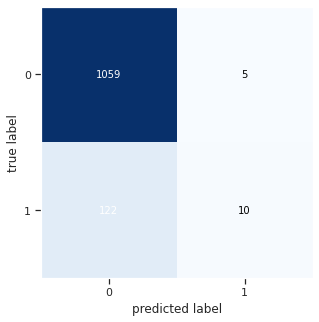

In [ ]:
y_hat=model_lg1.predict(scaler.fit_transform(X_test))
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5))

Skaliranje Train SMOTE dataseta

In [ ]:
X_sm_std_train=scaler.fit_transform(X_sm_train)
X_smteen_std_train=scaler.fit_transform(X_smteen)
X_smtom_std_train=scaler.fit_transform(X_smtom)
X_ada_std_train=scaler.fit_transform(X_ada)

Logisticka regresija na SMOTE datasetu

In [ ]:
#Logisticka regresija
from imblearn.pipeline import Pipeline

model_lg = LogisticRegression()
pipe_lg_smt = Pipeline(steps = [('smote', SMOTEENN(random_state=69)), 
                      ('MinMaxScaler', MinMaxScaler()),
                      ('logisticregression', model_lg)])
pipe_lg_smt.fit(X_train,Y_train)

results_lg = cross_val_score(pipe_lg_smt, X_train, Y_train, cv=10, scoring='accuracy')
f'Tačnost iznosi {round(np.mean(results_lg) * 100, 2)}% +/- {round(np.std(results_lg)*100, 2)}%'

'Tačnost iznosi 69.05% +/- 2.62%'

Imena kolona dataframe-a za uporedjivanje metrika modela

In [ ]:
columns_val=["precision_score","recall_score","accuracy_score","f1_score"]

Matrica konfuzije Logisticke regresije na SMOTE train datasetu

In [ ]:
y_hat = model_lg.predict(X_smteen_std_train)
eval_train=[]
eval_train.append(precision_score(Y_smteen, y_hat))
eval_train.append(recall_score(Y_smteen, y_hat))
eval_train.append(accuracy_score(Y_smteen, y_hat))
eval_train.append(f1_score(Y_smteen, y_hat))

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4aa521d0>)

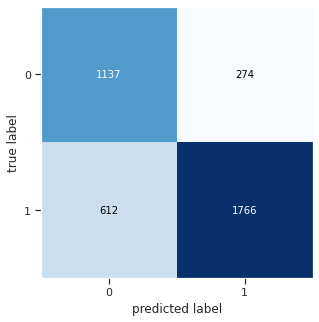

In [ ]:
mat = confusion_matrix(Y_smteen, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5))

Matrica konfuzije na SMOTE test datasetu

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a9c2990>)

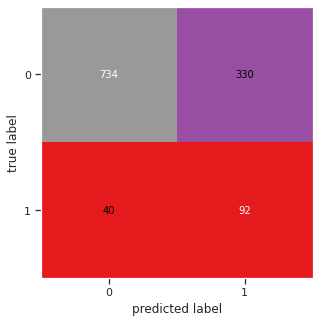

In [ ]:
y_hat = model_lg.predict(scaler.fit_transform(X_test))
eval_test=[]
eval_test.append(precision_score(Y_test, y_hat))
eval_test.append(recall_score(Y_test, y_hat))
eval_test.append(accuracy_score(Y_test, y_hat))
eval_test.append(f1_score(Y_test, y_hat))
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="Set1")

Matrica konfuzije na train datasetu sa SMOTE modelom

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4aa4ee50>)

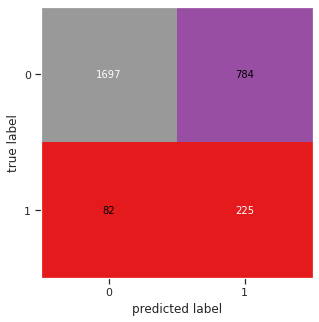

In [ ]:
y_hat = model_lg.predict(scaler.fit_transform(X_train))
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="Set1")

In [ ]:
eval_train_no_smt=[]
eval_train_no_smt.append(precision_score(Y_train, y_hat))
eval_train_no_smt.append(recall_score(Y_train, y_hat))
eval_train_no_smt.append(accuracy_score(Y_train, y_hat))
eval_train_no_smt.append(f1_score(Y_train, y_hat))

Model **Stabla odlucivanja** na vrsti **SMOTE-a** **train** datasetu

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_debth=[3,4,5,6,7]
min_samples=[10,15,20,25,30]
val_acc=[]
model=[]
for debth in max_debth:
  
  for leaf in min_samples:
    
    model_dt = DecisionTreeClassifier(criterion = "entropy",max_depth=debth,min_samples_leaf=leaf)

    pipe_dt_smt = Pipeline(steps = [('smote', SMOTEENN(random_state=69)),
                      ('decision_tree', model_dt)])
    pipe_dt_smt.fit(X_train, Y_train)

    model.append(model_dt)
    results_dt = cross_val_score(pipe_dt_smt, X_train, Y_train, cv=10, scoring='accuracy')
    val_acc.append(round(np.mean(results_dt) * 100, 2))
    #f'Tačnost iznosi {round(np.mean(results_dt) * 100, 2)}% +/- {round(np.std(results_dt)*100, 2)}%'

In [ ]:
val_acc

[75.97,
 75.94,
 75.9,
 75.9,
 75.83,
 80.96,
 80.92,
 80.67,
 80.67,
 80.2,
 82.0,
 81.89,
 81.21,
 81.06,
 81.06,
 81.78,
 81.42,
 80.85,
 79.99,
 80.56,
 80.92,
 80.38,
 80.92,
 79.95,
 79.7]

In [ ]:
model_dt=model[val_acc.index(max(val_acc))]

In [ ]:
!pip install dtreeviz

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


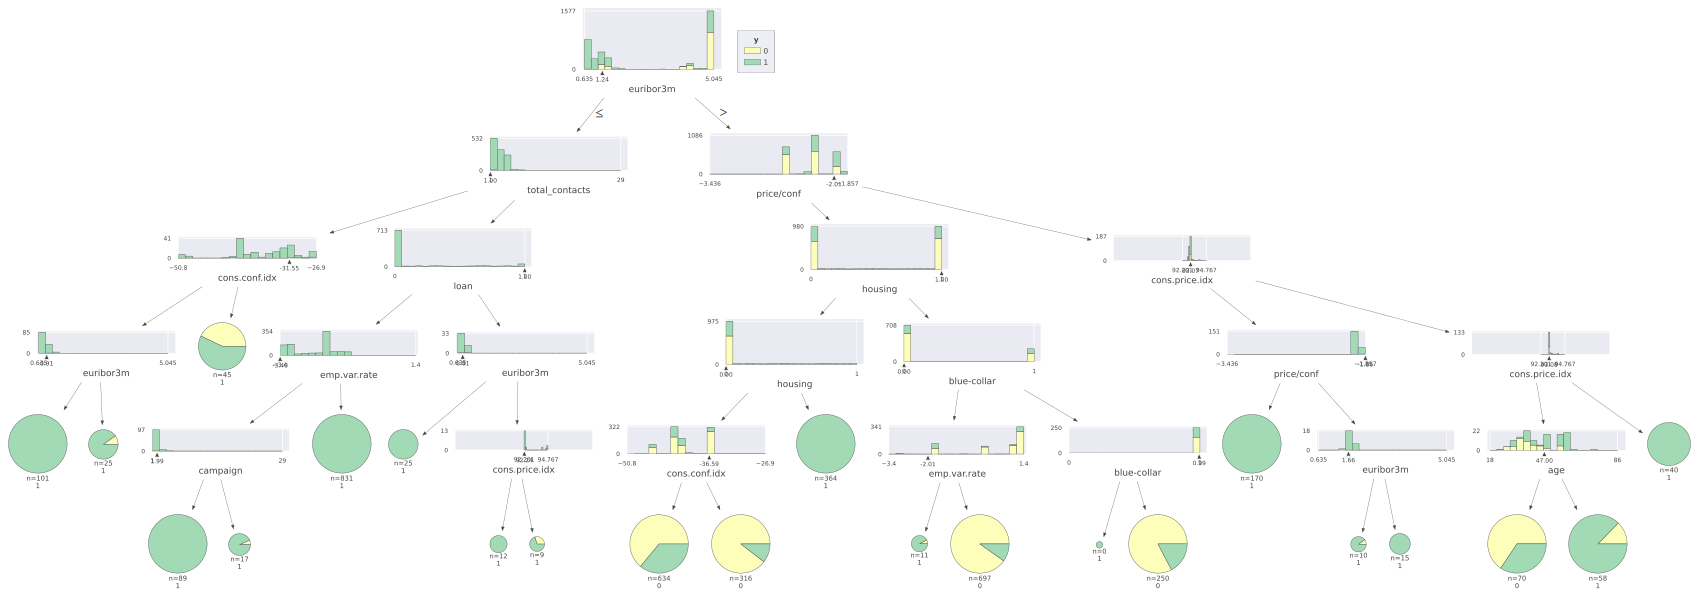

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(model_dt, X_smteen, Y_smteen,
                target_name="y",
                feature_names=X_smteen.columns,
                class_names=("0","1"))

viz


Matrica konfuzije **Stabla Odlucivanja** na vrsti **SMOTE-a Train** datasetu




In [ ]:
y_hat = model_dt.predict(X_smteen)
eval_train.append(precision_score(Y_smteen, y_hat))
eval_train.append(recall_score(Y_smteen, y_hat))
eval_train.append(accuracy_score(Y_smteen, y_hat))
eval_train.append(f1_score(Y_smteen, y_hat))

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a977b50>)

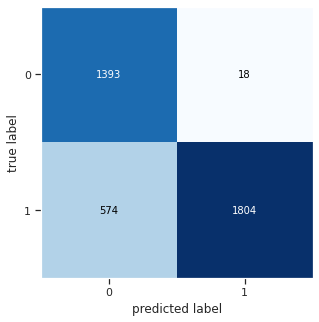

In [ ]:
mat = confusion_matrix(Y_smteen, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5))

Matrica konfuzije **Stabla Odlucivanja** na **test datasetu**

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a8caa50>)

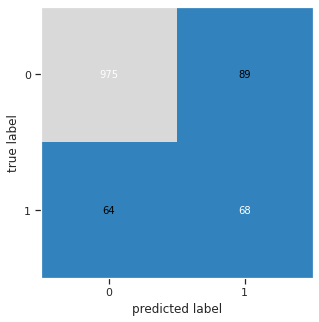

In [ ]:
y_hat = model_dt.predict(X_test)
eval_test.append(precision_score(Y_test, y_hat))
eval_test.append(recall_score(Y_test, y_hat))
eval_test.append(accuracy_score(Y_test, y_hat))
eval_test.append(f1_score(Y_test, y_hat))
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

SMOTE Stablo odlucivanja na train datasetu

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a936c90>)

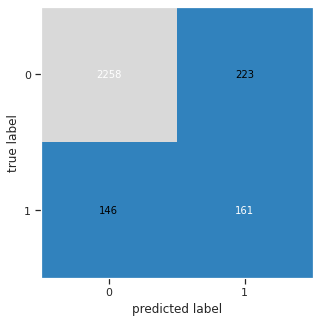

In [ ]:
y_hat = model_dt.predict(X_train)
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
eval_train_no_smt.append(precision_score(Y_train, y_hat))
eval_train_no_smt.append(recall_score(Y_train, y_hat))
eval_train_no_smt.append(accuracy_score(Y_train, y_hat))
eval_train_no_smt.append(f1_score(Y_train, y_hat))

Kako bi izgledao model **Stabla Odlucivanja** bez Oversamplinga?

In [ ]:
val_acc2=[]
model2=[]
for debth in max_debth:
  
  for leaf in min_samples:
    
    model_dt2 = DecisionTreeClassifier(criterion = "entropy",max_depth=debth,min_samples_leaf=leaf)
    model_dt2.fit(X_train, Y_train)
    model2.append(model_dt2)
    results_dt = cross_val_score(model_dt2, X_train, Y_train, cv=10, scoring='f1')
    val_acc2.append(round(np.mean(results_dt) * 100, 2))
    #Rezultati krosvalidacije bez oversamplinga

In [ ]:
val_acc2

[23.3,
 20.82,
 15.86,
 16.77,
 18.03,
 26.06,
 23.83,
 19.75,
 20.41,
 21.25,
 28.93,
 27.74,
 24.58,
 24.05,
 25.57,
 30.38,
 28.81,
 25.26,
 25.1,
 25.57,
 29.68,
 28.6,
 25.63,
 25.1,
 25.57]

In [ ]:
model_dt2=model2[val_acc2.index(max(val_acc2))]
#bez oversamplinga

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


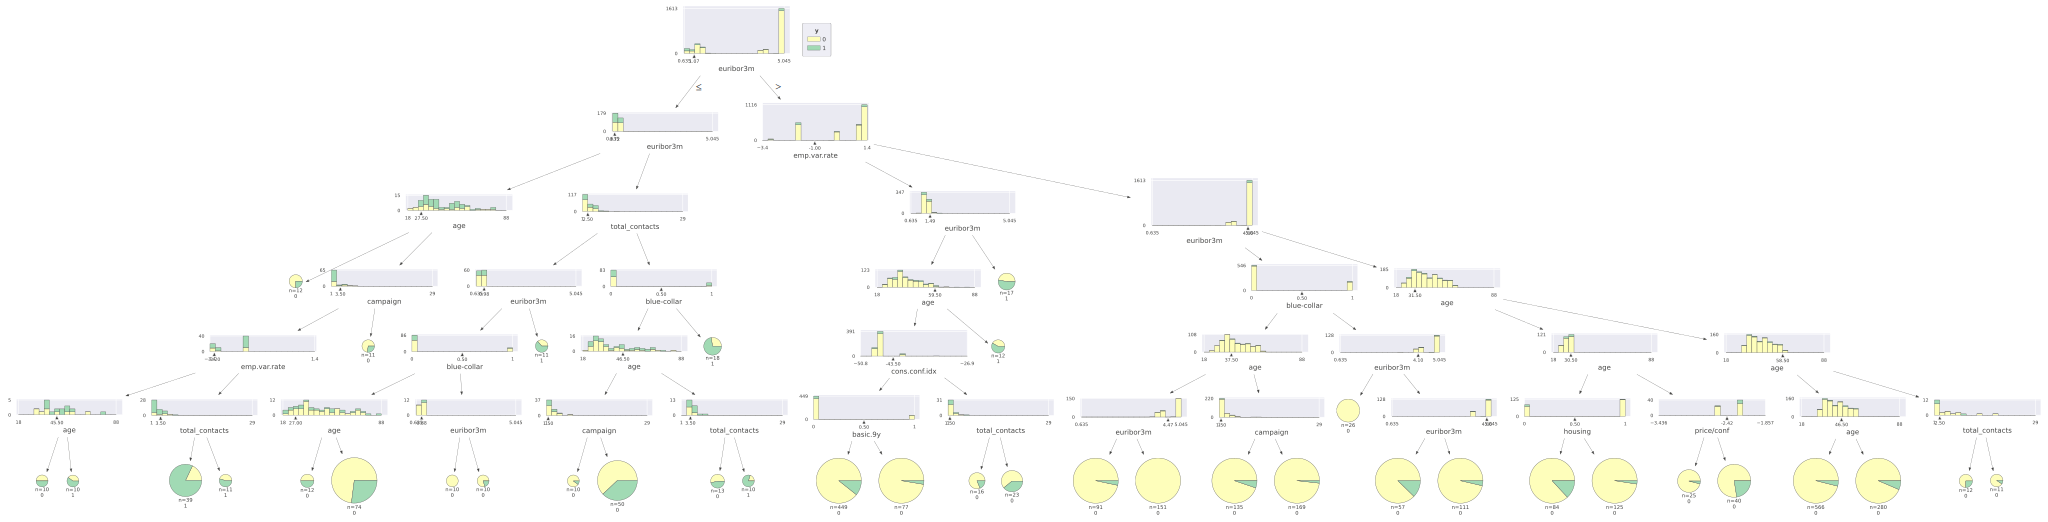

In [ ]:
viz = dtreeviz(model_dt2, X_train, Y_train,
                target_name="y",
                feature_names=X_train.columns,
                class_names=("0","1"))

viz

In [ ]:
y_hat=model_dt2.predict(X_train)

Matrica konfuzije stabla odlucivanja bez oversamplinga na train datasetu

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a7ff890>)

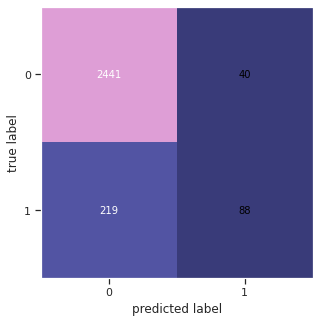

In [ ]:
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20b")
#bez oversamplinga

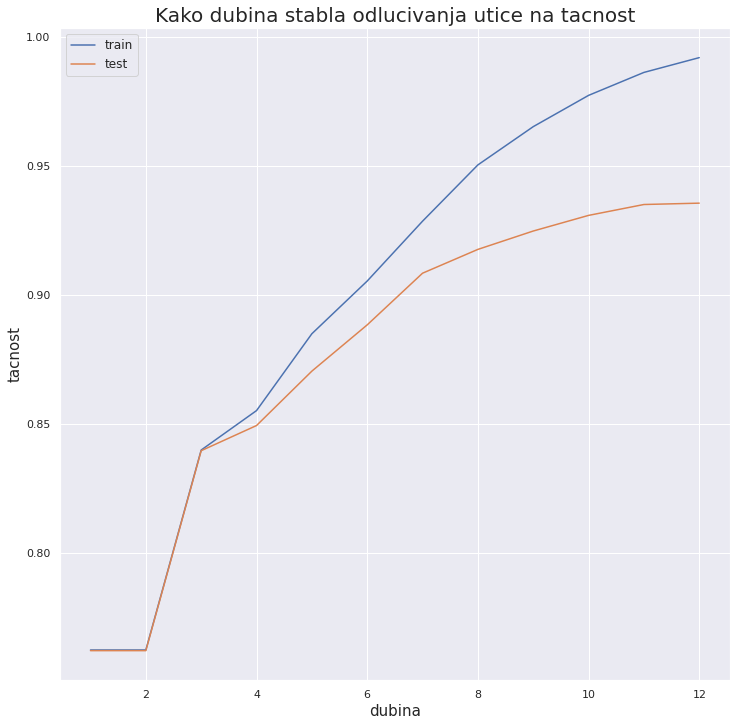

In [ ]:
from sklearn.model_selection import validation_curve
param_range = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_smteen, Y_smteen, param_name = "max_depth", param_range = param_range)
plt.figure(figsize = (12, 12))

plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

plt.title("Kako dubina stabla odlucivanja utice na tacnost", fontsize = 20)
plt.xlabel("dubina", fontsize = 15)
plt.ylabel("tacnost", fontsize = 15)

plt.legend(["train", "test"], loc = "upper left", fontsize = 12)

plt.show()

Random Forest na SMOTEEN train datasetu

In [ ]:
from sklearn.ensemble import RandomForestClassifier
val_acc_rf=[]
models_rf=[]
for debth in max_debth:
  
  for leaf in min_samples:
    
    model_rf = RandomForestClassifier(criterion = "entropy",max_depth=debth,min_samples_leaf=leaf)
    pipe_rf_smt=Pipeline(steps = [('smote', SMOTEENN(random_state=69)),
                                  ('random_forest', model_rf)])
    pipe_rf_smt.fit(X_train, Y_train)
    models_rf.append(model_rf)

    results_rf = cross_val_score(pipe_rf_smt, X_train, Y_train, cv=10, scoring='accuracy')
    val_acc_rf.append(round(np.mean(results_rf) * 100, 2))

In [ ]:
val_acc_rf

[73.32,
 72.67,
 73.46,
 73.1,
 73.06,
 75.94,
 76.44,
 76.76,
 75.76,
 75.9,
 78.02,
 77.84,
 77.84,
 77.62,
 77.44,
 79.13,
 79.41,
 79.27,
 78.84,
 78.84,
 81.06,
 80.74,
 79.95,
 79.45,
 79.63]

In [ ]:
model_rf=models_rf[val_acc_rf.index(max(val_acc_rf))]

Matrica konfuzije modela Random Forest na SMOTEEN train datasetu

In [ ]:
y_hat = model_rf.predict(X_smteen)
eval_train.append(precision_score(Y_smteen, y_hat))
eval_train.append(recall_score(Y_smteen, y_hat))
eval_train.append(accuracy_score(Y_smteen, y_hat))
eval_train.append(f1_score(Y_smteen, y_hat))

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a7e0050>)

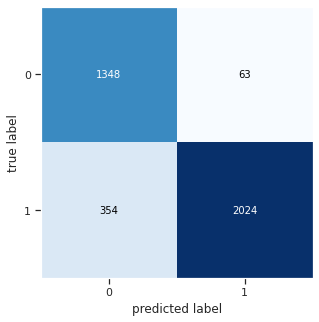

In [ ]:
mat = confusion_matrix(Y_smteen, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5))

Matrica konfuzije Random Forest-a na test datasetu

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a7b7410>)

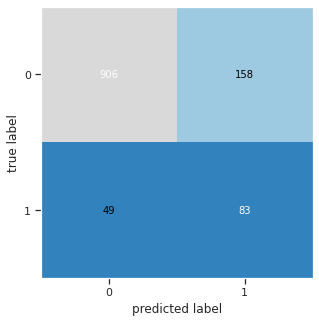

In [ ]:
y_hat = model_rf.predict(X_test)
eval_test.append(precision_score(Y_test, y_hat))
eval_test.append(recall_score(Y_test, y_hat))
eval_test.append(accuracy_score(Y_test, y_hat))
eval_test.append(f1_score(Y_test, y_hat))
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

SMOTE Random forest na train data setu 

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a703910>)

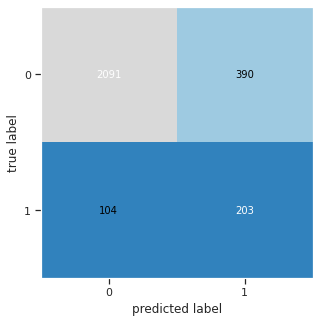

In [ ]:
y_hat = model_rf.predict(X_train)
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
eval_train_no_smt.append(precision_score(Y_train, y_hat))
eval_train_no_smt.append(recall_score(Y_train, y_hat))
eval_train_no_smt.append(accuracy_score(Y_train, y_hat))
eval_train_no_smt.append(f1_score(Y_train, y_hat))

Model SVM na SMOTEEN train datasetu

In [ ]:
from sklearn.svm import SVC
val_acc_svm=[]
models_svm=[]

gamas=[0.3,0.1,0.09,0.08,0.06,0.04,0.03,0.01,0.008,0.006,0.003,0.001]
Cs=[1,3,5,7,10,15,20]
for c in Cs:
  for gama in gamas:
    model_svm = SVC(kernel = "rbf", gamma = gama, C = c,probability=True)

    pipe_svm=Pipeline(steps = [('smote', SMOTEENN(random_state=69)),
                               ("scaler",MinMaxScaler()),
                              ('SVM', model_svm)])
    pipe_svm.fit(X_train, Y_train)

    results_svm = cross_val_score(pipe_svm, X_train, Y_train, cv=10, scoring='accuracy')
    models_svm.append(model_svm)
    val_acc_svm.append(round(np.mean(results_svm) * 100, 2))
#f'Tačnost iznosi {round(np.mean(results_lg) * 100, 2)}% +/- {round(np.std(results_lg)*100, 2)}%'

In [ ]:
max_value = max(val_acc_svm)
model_svm=models_svm[val_acc_svm.index(max_value)]
print(max_value)

80.99


Matrica konfuzije SVM na SMOTEENN train datasetu

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a6e2a90>)

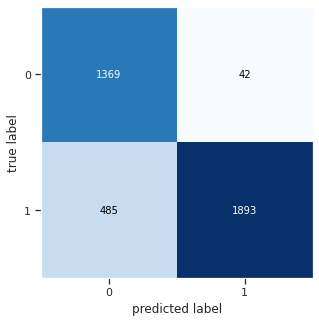

In [ ]:
y_hat = model_svm.predict(X_smteen_std_train)
eval_train.append(precision_score(Y_smteen, y_hat))
eval_train.append(recall_score(Y_smteen, y_hat))
eval_train.append(accuracy_score(Y_smteen, y_hat))
eval_train.append(f1_score(Y_smteen, y_hat))
mat = confusion_matrix(Y_smteen, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5))

Matrica konfuzije SVM na test datasetu

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a6435d0>)

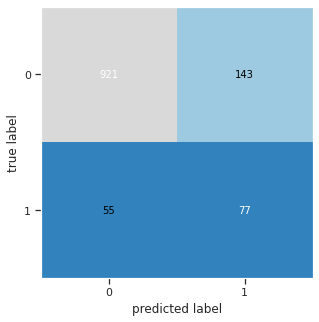

In [ ]:
y_hat = model_svm.predict(scaler.fit_transform(X_test))
eval_test.append(precision_score(Y_test, y_hat))
eval_test.append(recall_score(Y_test, y_hat))
eval_test.append(accuracy_score(Y_test, y_hat))
eval_test.append(f1_score(Y_test, y_hat))
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

Matrica konfuzije SMOTE SVM-a na train datasetu

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a5fe1d0>)

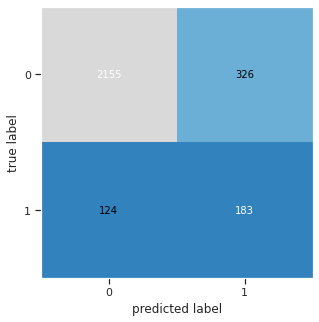

In [ ]:
y_hat = model_svm.predict(scaler.fit_transform(X_train))
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
eval_train_no_smt.append(precision_score(Y_train, y_hat))
eval_train_no_smt.append(recall_score(Y_train, y_hat))
eval_train_no_smt.append(accuracy_score(Y_train, y_hat))
eval_train_no_smt.append(f1_score(Y_train, y_hat))

In [ ]:
eval_train=np.asarray(eval_train)
eval_train=eval_train.reshape(-1,4)

In [ ]:
eval_train_no_smt=np.asarray(eval_train_no_smt)
eval_train_no_smt=eval_train_no_smt.reshape(-1,4)

In [ ]:
ind=["Logistic reg","Decision tree","Random forest","SVM"]

In [ ]:
df_eval_train=pd.DataFrame(eval_train,columns=columns_val,index=ind)

Evaluacija modela na SMOTE train datasetu

In [ ]:
df_eval_train

precision_score  recall_score  accuracy_score  f1_score
Logistic reg          0.865686      0.742641        0.766165  0.799457
Decision tree         0.990121      0.758621        0.843758  0.859048
Random forest         0.969813      0.851135        0.889945  0.906607
SVM                   0.978295      0.796047        0.860913  0.877811

In [ ]:
eval_test=np.asarray(eval_test)
eval_test=eval_test.reshape(-1,4)


In [ ]:
df_eval_test=pd.DataFrame(eval_test,columns=columns_val,index=ind)

Evaluacija modela na test datasetu

In [ ]:
df_eval_test

precision_score  recall_score  accuracy_score  f1_score
Logistic reg          0.218009      0.696970        0.690635  0.332130
Decision tree         0.433121      0.515152        0.872074  0.470588
Random forest         0.344398      0.628788        0.826923  0.445040
SVM                   0.350000      0.583333        0.834448  0.437500

In [ ]:
df_eval_train_no_smote=pd.DataFrame(eval_train_no_smt,columns=columns_val,index=ind)

Evaluacija modela na train datasetu bez SMOTE-A

In [ ]:
df_eval_train_no_smote

precision_score  recall_score  accuracy_score  f1_score
Logistic reg          0.222993      0.732899        0.689383  0.341945
Decision tree         0.419271      0.524430        0.867647  0.465991
Random forest         0.342327      0.661238        0.822812  0.451111
SVM                   0.359528      0.596091        0.838594  0.448529

Kako bi pomeranje granica aktivacije uticalo na metrike Logicke regresije bez OverSamplinga na train dataset?

In [ ]:
eval_limit_train=[]
for i in range(1,10,1):
  y_hat = model_lg1.predict_proba(X_std_train)[:, 1] >= i/10
  eval_limit_train.append(precision_score(Y_train, y_hat))
  eval_limit_train.append(recall_score(Y_train, y_hat))
  eval_limit_train.append(accuracy_score(Y_train, y_hat))
  eval_limit_train.append(f1_score(Y_train, y_hat))

eval_limit_train=np.asarray(eval_limit_train)
eval_limit_train=eval_limit_train.reshape(-1,4)
limit=["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"]
df_limit_train=pd.DataFrame(eval_limit_train,columns=columns_val,index=limit)

In [ ]:
df_limit_train

precision_score  recall_score  accuracy_score  f1_score
0.1         0.242250      0.687296        0.728838  0.358234
0.2         0.409574      0.501629        0.865495  0.450952
0.3         0.456274      0.390879        0.881636  0.421053
0.4         0.480769      0.244300        0.887733  0.323974
0.5         0.576923      0.048860        0.891320  0.090090
0.6         1.000000      0.003257        0.890244  0.006494
0.7         0.000000      0.000000        0.889885  0.000000
0.8         0.000000      0.000000        0.889885  0.000000
0.9         0.000000      0.000000        0.889885  0.000000

Kako bi pomeranje granice aktivacije logisticke regresije uticalo na njegovu metriku na test Dataset-u 

In [ ]:
eval_limit_test=[]
for i in range(1,10,1):
  y_hat = model_lg1.predict_proba(scaler.fit_transform(X_test))[:, 1] >= i/10
  eval_limit_test.append(precision_score(Y_test, y_hat))
  eval_limit_test.append(recall_score(Y_test, y_hat))
  eval_limit_test.append(accuracy_score(Y_test, y_hat))
  eval_limit_test.append(f1_score(Y_test, y_hat))

eval_limit_test=np.asarray(eval_limit_test)
eval_limit_test=eval_limit_test.reshape(-1,4)
limit=["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"]
df_limit_test=pd.DataFrame(eval_limit_test,columns=columns_val,index=limit)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_limit_test

precision_score  recall_score  accuracy_score  f1_score
0.1         0.240000      0.681818        0.726589  0.355030
0.2         0.425150      0.537879        0.868729  0.474916
0.3         0.509615      0.401515        0.891304  0.449153
0.4         0.582090      0.295455        0.898829  0.391960
0.5         0.666667      0.075758        0.893813  0.136054
0.6         0.666667      0.015152        0.890468  0.029630
0.7         0.000000      0.000000        0.889632  0.000000
0.8         0.000000      0.000000        0.889632  0.000000
0.9         0.000000      0.000000        0.889632  0.000000

Model **Stacking-a** na SMOTE train datasetu

In [ ]:
lvl0=[("lg",make_pipeline(MinMaxScaler(), model_lg)),("dt",model_dt),("rf",model_rf),("svc",make_pipeline(MinMaxScaler(),model_svm))]
lvl1=DecisionTreeClassifier(criterion = "entropy",max_depth=3)

In [ ]:
from sklearn.ensemble import StackingClassifier
model_stack = StackingClassifier(estimators=lvl0, final_estimator=lvl1, cv=10)
model_stack.fit(X_smteen, Y_smteen)
results_rf = cross_val_score(model_stack, X_smteen, Y_smteen, cv=10, scoring='accuracy')


In [ ]:
print(round(np.mean(results_rf) * 100, 2))

91.37


Matrica konfuzije **stackinga** na SMOTE train datasetu

precision 0.9546049759930162
recall 0.9196804037005887
accuracy 0.922143045658485
F1 0.9368173056328978


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a703310>)

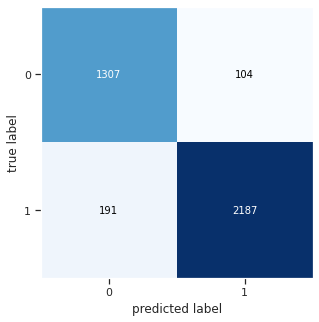

In [ ]:
y_hat = model_stack.predict(X_smteen)
print("precision",precision_score(Y_smteen, y_hat))
print("recall",recall_score(Y_smteen, y_hat))
print("accuracy",accuracy_score(Y_smteen, y_hat))
print("F1",f1_score(Y_smteen, y_hat))
mat = confusion_matrix(Y_smteen, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5))

Matrica konfuzije **stackinga** na test datasetu

In [ ]:
eval_test_ensl=[]
eval_train_ensl=[]

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a4c57d0>)

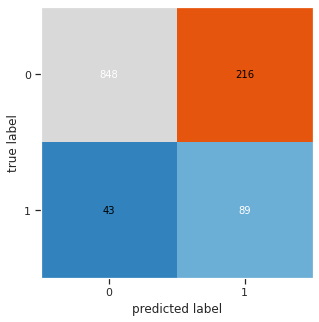

In [ ]:
y_hat=model_stack.predict(X_test)
eval_test_ensl.append(precision_score(Y_test, y_hat))
eval_test_ensl.append(recall_score(Y_test, y_hat))
eval_test_ensl.append(accuracy_score(Y_test, y_hat))
eval_test_ensl.append(f1_score(Y_test, y_hat))
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

Matrica konfuzije **stackinga** na train datasetu bez SMOT-a

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4a485cd0>)

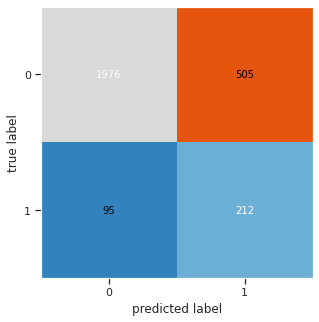

In [ ]:
y_hat=model_stack.predict(X_train)
eval_train_ensl.append(precision_score(Y_train, y_hat))
eval_train_ensl.append(recall_score(Y_train, y_hat))
eval_train_ensl.append(accuracy_score(Y_train, y_hat))
eval_train_ensl.append(f1_score(Y_train, y_hat))
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

**Bagging** model klasifikacije sa **SVM** osnovom

In [ ]:
from sklearn.ensemble import BaggingClassifier

model_bag = BaggingClassifier(base_estimator=model_svm, n_estimators=10, random_state=42)
pipe_bag_svm=Pipeline(steps = [('smote', SMOTEENN(random_state=69)),
                               ("MinMaxScaler",MinMaxScaler()),
                              ('svm_bagging', model_bag)])
pipe_bag_svm.fit(X_train, Y_train)
results_bag = cross_val_score(pipe_bag_svm, X_train, Y_train, cv=10, scoring='accuracy')
print(round(np.mean(results_bag) * 100, 2))

79.92


Matrica konfuzije **SVM  bagginga** na **test** datasetu







(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4b0ef950>)

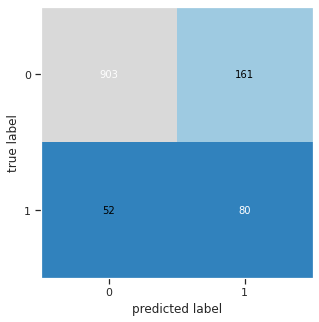

In [ ]:
y_hat=model_bag.predict(scaler.fit_transform(X_test))
eval_test_ensl.append(precision_score(Y_test, y_hat))
eval_test_ensl.append(recall_score(Y_test, y_hat))
eval_test_ensl.append(accuracy_score(Y_test, y_hat))
eval_test_ensl.append(f1_score(Y_test, y_hat))
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

Matrica konfuzije **SVM bagginga** na **train** datasetu

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4b0e5150>)

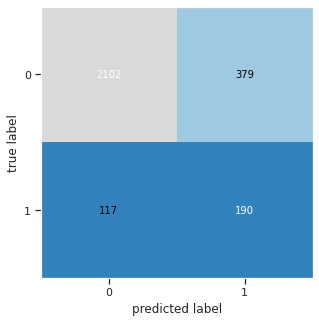

In [ ]:
y_hat=model_bag.predict(scaler.fit_transform(X_train))
eval_train_ensl.append(precision_score(Y_train, y_hat))
eval_train_ensl.append(recall_score(Y_train, y_hat))
eval_train_ensl.append(accuracy_score(Y_train, y_hat))
eval_train_ensl.append(f1_score(Y_train, y_hat))
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

**Bagging** klasifikator sa **Random Tree** osnovom

In [ ]:
model_bag_rf = BaggingClassifier(base_estimator=model_rf, n_estimators=100, random_state=42)

pipe_bag_rf=Pipeline(steps = [('smote', SMOTEENN(random_state=69)),
                                ('random_forest', model_bag_rf)])
pipe_bag_rf.fit(X_train, Y_train)

results_bag_rf = cross_val_score(pipe_bag_rf, X_train, Y_train, cv=10, scoring='accuracy')
print(round(np.mean(results_bag_rf) * 100, 2))

80.67


Matrica konfuzije **Random Tree bagginga** na test datasetu

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4ed6b3d0>)

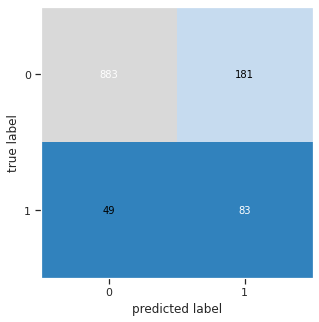

In [ ]:
y_hat=model_bag_rf.predict(X_test)
eval_test_ensl.append(precision_score(Y_test, y_hat))
eval_test_ensl.append(recall_score(Y_test, y_hat))
eval_test_ensl.append(accuracy_score(Y_test, y_hat))
eval_test_ensl.append(f1_score(Y_test, y_hat))
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

Matrica konfuzije **Random Tree bagginga** na train datasetu



(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4af0da10>)

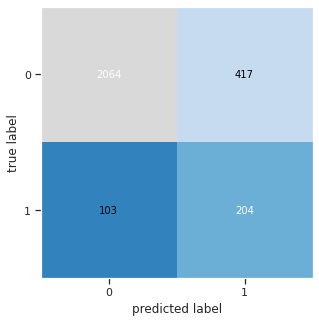

In [ ]:
y_hat=model_bag_rf.predict(X_train)
eval_train_ensl.append(precision_score(Y_train, y_hat))
eval_train_ensl.append(recall_score(Y_train, y_hat))
eval_train_ensl.append(accuracy_score(Y_train, y_hat))
eval_train_ensl.append(f1_score(Y_train, y_hat))
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model_xgb=XGBClassifier()
params={"n_estimators":[67,70,100,120],'reg_lambda':[2,1],'gamma':[0,0.3,0.2,0.1]
       ,'eta':[0.06,0.05,0.04]
        ,"max_depth":[3,5],'objective':['binary:logistic']}

In [ ]:
#pipe_xgb=Pipeline(steps = [('smote', SMOTEENN(random_state=69)),
                                #('XGB', model_xgb)])
#pipe_xgb.fit(X_train, Y_train)

clf=GridSearchCV(model_xgb,params,cv=10,n_jobs=-1,verbose=0)
clf.fit(X_smteen,Y_smteen)

GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'eta': [0.06, 0.05, 0.04], 'gamma': [0, 0.3, 0.2, 0.1],
                         'max_depth': [3, 5],
                         'n_estimators': [67, 70, 100, 120],
                         'objective': ['binary:logistic'],
                         'reg_lambda': [2, 1]})

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4e5bf450>)

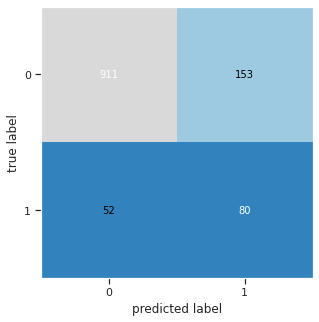

In [ ]:
y_hat=clf.predict(X_test)
eval_test_ensl.append(precision_score(Y_test, y_hat))
eval_test_ensl.append(recall_score(Y_test, y_hat))
eval_test_ensl.append(accuracy_score(Y_test, y_hat))
eval_test_ensl.append(f1_score(Y_test, y_hat))
mat = confusion_matrix(Y_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4caa26d0>)

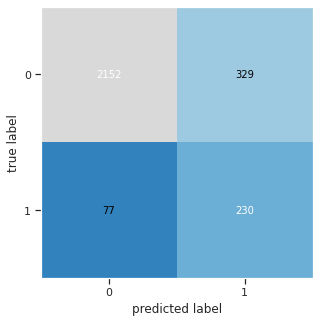

In [ ]:
y_hat=clf.predict(X_train)
eval_train_ensl.append(precision_score(Y_train, y_hat))
eval_train_ensl.append(recall_score(Y_train, y_hat))
eval_train_ensl.append(accuracy_score(Y_train, y_hat))
eval_train_ensl.append(f1_score(Y_train, y_hat))
mat = confusion_matrix(Y_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
ind_ensl=["Stacking","SVM_Bagging","RF_Bagging","XGB"]
eval_train_ensl=np.asarray(eval_train_ensl).reshape(-1,4)
eval_test_ensl=np.asarray(eval_test_ensl).reshape(-1,4)

Ukupna evaluacija na **Train** datasetu

In [ ]:
df_train_no_smt_ensl=pd.DataFrame(eval_train_ensl,columns=columns_val,index=ind_ensl)
df_train=pd.concat([df_eval_train_no_smote,df_train_no_smt_ensl])
df_train

precision_score  recall_score  accuracy_score  f1_score
Logistic reg          0.222993      0.732899        0.689383  0.341945
Decision tree         0.419271      0.524430        0.867647  0.465991
Random forest         0.342327      0.661238        0.822812  0.451111
SVM                   0.359528      0.596091        0.838594  0.448529
Stacking              0.295676      0.690554        0.784792  0.414062
SVM_Bagging           0.333919      0.618893        0.822095  0.433790
RF_Bagging            0.328502      0.664495        0.813486  0.439655
XGB                   0.411449      0.749186        0.854376  0.531178

Ukupna Evaluacija na **Test** datasetu

In [ ]:
df_test_ensl=pd.DataFrame(eval_test_ensl,columns=columns_val,index=ind_ensl)
df_test=pd.concat([df_eval_test,df_test_ensl])
df_test

precision_score  recall_score  accuracy_score  f1_score
Logistic reg          0.218009      0.696970        0.690635  0.332130
Decision tree         0.433121      0.515152        0.872074  0.470588
Random forest         0.344398      0.628788        0.826923  0.445040
SVM                   0.350000      0.583333        0.834448  0.437500
Stacking              0.291803      0.674242        0.783445  0.407323
SVM_Bagging           0.331950      0.606061        0.821906  0.428954
RF_Bagging            0.314394      0.628788        0.807692  0.419192
XGB                   0.343348      0.606061        0.828595  0.438356

**SMOTE train Dataset**

Text(0.5, 1.0, 'SMOTE Test')

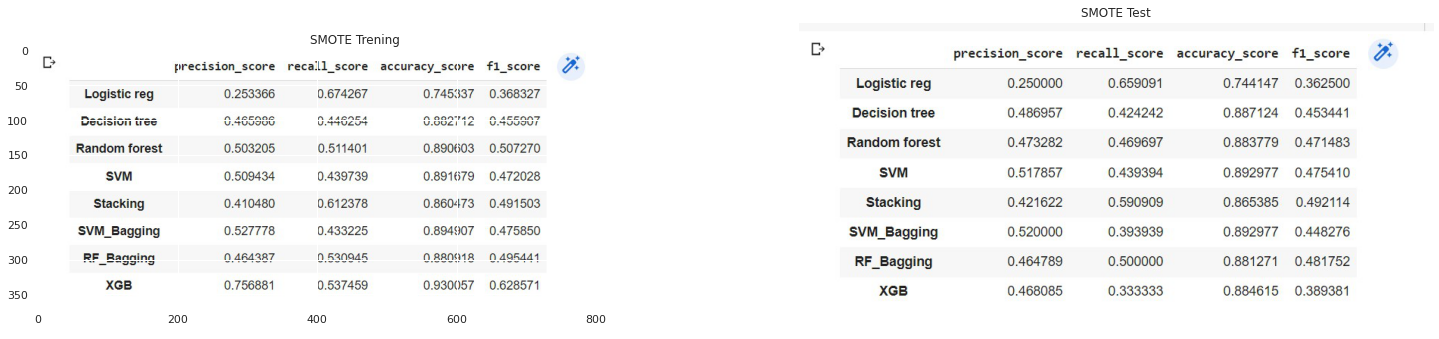

In [ ]:
from IPython.core.pylabtools import figsize
from IPython.display import Image
import imageio
img1=imageio.imread('./drive/MyDrive/img/SMOTE-train.jpg')
img2=imageio.imread('./drive/MyDrive/img/SMOTE-test.jpg')

fig,arr=plt.subplots(1,2,figsize=(25,12))
plt.axis('off')
arr[0].imshow(img1)
arr[1].imshow(img2)
arr[0].set_title("SMOTE Trening")
arr[1].set_title("SMOTE Test")


Text(0.5, 1.0, 'ADASYN Test')

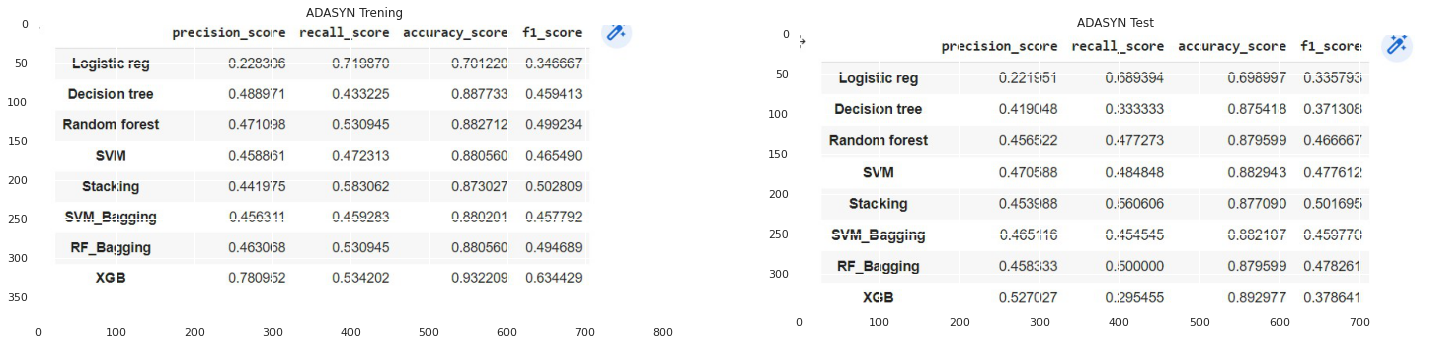

In [ ]:
img1=imageio.imread('./drive/MyDrive/img/ADASYN-train.jpg')
img2=imageio.imread('./drive/MyDrive/img/ADASYN-test.jpg')
fig,arr=plt.subplots(1,2,figsize=(25,12))
arr[0].imshow(img1)
arr[1].imshow(img2)
arr[0].set_title("ADASYN Trening")
arr[1].set_title("ADASYN Test")

Text(0.5, 1.0, 'SMOTETomek Test')

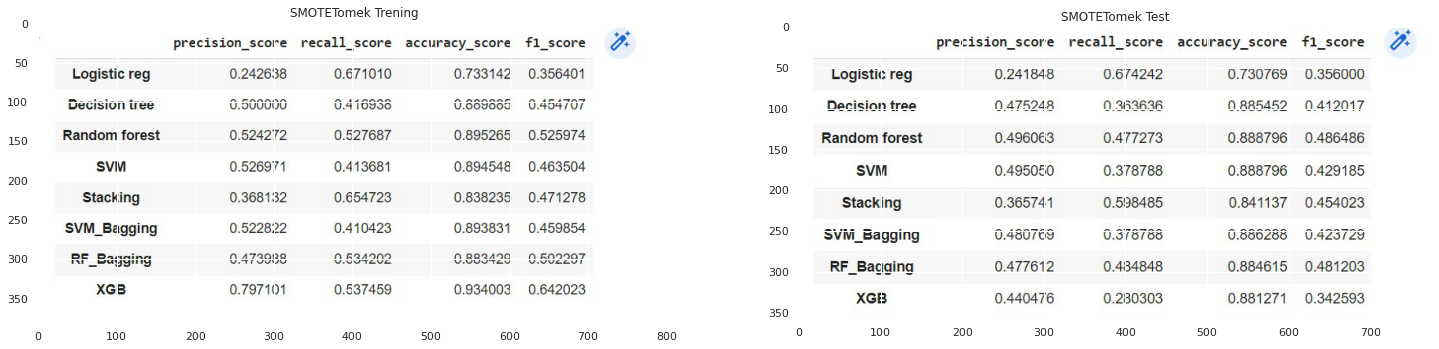

In [ ]:
img1=imageio.imread('./drive/MyDrive/img/SMOTETomek-train.jpg')
img2=imageio.imread('./drive/MyDrive/img/SMOTETomek-test.jpg')
fig,arr=plt.subplots(1,2,figsize=(25,12))
arr[0].imshow(img1)
arr[1].imshow(img2)
arr[0].set_title("SMOTETomek Trening")
arr[1].set_title("SMOTETomek Test")

Text(0.5, 1.0, 'SMTEENN Test')

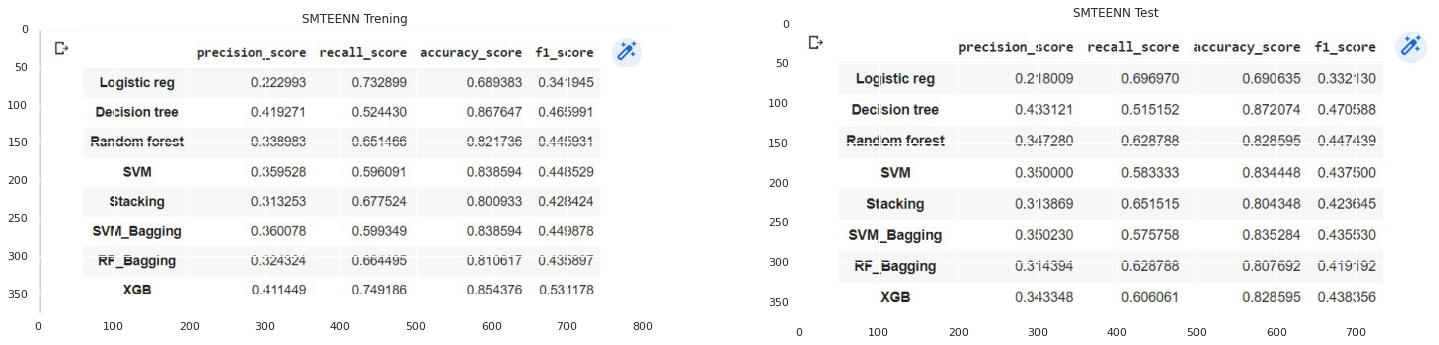

In [ ]:
img1=imageio.imread('./drive/MyDrive/img/SMTEENN-train.jpg')
img2=imageio.imread('./drive/MyDrive/img/SMTEENN-test.jpg')
fig,arr=plt.subplots(1,2,figsize=(25,12))
arr[0].imshow(img1)
arr[1].imshow(img2)
arr[0].set_title("SMTEENN Trening")
arr[1].set_title("SMTEENN Test")

Model sa najboljim preformansama je XGB na SMOTEENN oversampling-u. Najvise zbog uticaja recall metrike, jer pozivom tj kampanjom zelimo da pozovemo odgovarajuceg klijenta koji ce se prijaviti na subscripciju odgovarajuceg paketa. Zato je bitno da pozovemo vise klijenata koji ce dati pozitivan odgovor, ali da ne gubimo dosta vremena na one koje nece.
Zato XGB na SMOTEENN oversampling metodi daje najbolji rezultat.




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


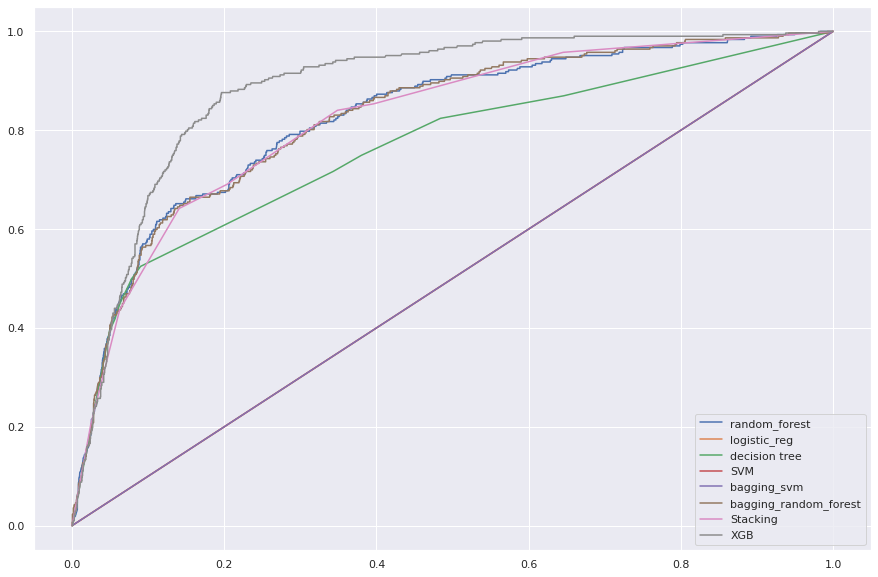

In [ ]:
from sklearn.metrics import roc_curve
leg=["random_forest","logistic_reg","decision tree","SVM","bagging_svm","bagging_random_forest","Stacking","XGB"]
models=[model_rf,model_lg,model_dt,model_svm,model_bag,model_bag_rf,model_stack,clf]
plt.figure(figsize=(15,10))
for model in models:
  fpr, tpr, thresholds = roc_curve(Y_train, model.predict_proba(X_train)[:, 1])

  plt.plot(fpr, tpr)

plt.legend(leg)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_train=[]
for model in models:
  roc_train.append(roc_auc_score(Y_train,model.predict_proba(X_train)[:, 1]))
df_roc_train=pd.DataFrame(np.array(roc_train).reshape(-1,1),columns=["ROC Score"],index=leg)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
df_roc_train

ROC Score
random_forest           0.826090
logistic_reg            0.500000
decision tree           0.762802
SVM                     0.500000
bagging_svm             0.500000
bagging_random_forest   0.825619
Stacking                0.822818
XGB                     0.887642

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


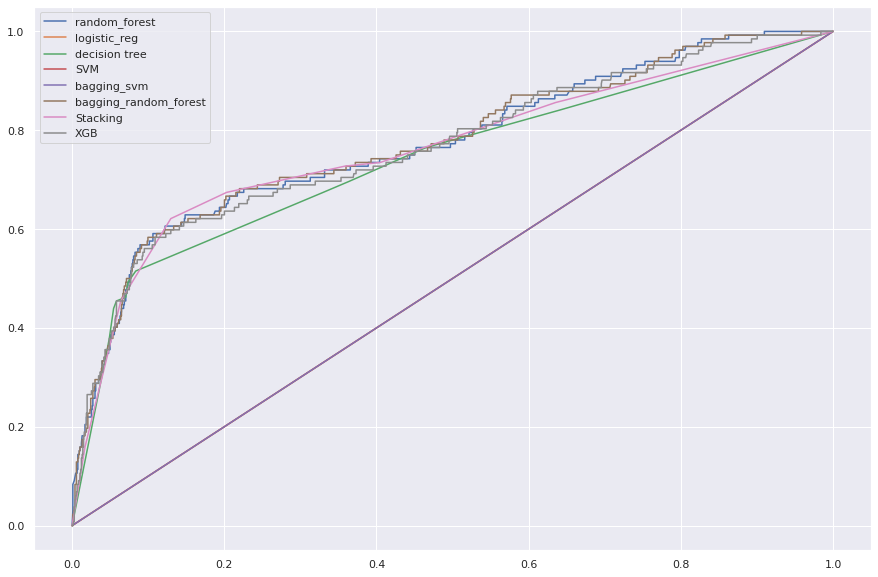

In [ ]:
plt.figure(figsize=(15,10))
for model in models:
  fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])

  plt.plot(fpr, tpr)

plt.legend(leg)

In [ ]:
roc_test=[]
for model in models:
  roc_test.append(roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]))
df_roc_test=pd.DataFrame(np.array(roc_test).reshape(-1,1),columns=["ROC Score"],index=leg)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
df_roc_test

ROC Score
random_forest           0.773528
logistic_reg            0.500000
decision tree           0.740758
SVM                     0.500000
bagging_svm             0.500000
bagging_random_forest   0.774628
Stacking                0.763240
XGB                     0.766686

In [ ]:
import joblib

In [ ]:
dir_model="./drive/MyDrive/ColabNotebooks/model/"

In [ ]:
joblib.dump(model_rf,dir_model+"random_forest_model.pkl")
joblib.dump(model_lg,dir_model+"log_reg.pkl")
joblib.dump(model_lg1,dir_model+"log_reg_no_smt.pkl")
joblib.dump(model_dt,dir_model+"dt.pkl")
joblib.dump(model_dt2,dir_model+"dt_no_smt.pkl")
joblib.dump(model_svm,dir_model+"svm.pkl")
joblib.dump(model_bag,dir_model+"bagg_svm.pkl")
joblib.dump(model_bag_rf,dir_model+"bagg_rf.pkl")
joblib.dump(model_stack,dir_model+"stack.pkl")
joblib.dump(clf,dir_model+"xgb.pkl")

['./drive/MyDrive/ColabNotebooks/model/xgb.pkl']

In [ ]:
model_xgb=joblib.load(dir_model+"xgb.pkl")

In [ ]:
model_rf=joblib.load(dir_model+"random_forest_model.pkl")
model_lg=joblib.load(dir_model+"log_reg.pkl")
model_dt=joblib.load(dir_model+"dt.pkl")
model_svm=joblib.load(dir_model+"svm.pkl")
model_bag_svm=joblib.load(dir_model+"bagg_svm.pkl")
model_bag_rf=joblib.load(dir_model+"bagg_rf.pkl")
model_stack=joblib.load(dir_model+"stack.pkl")
model_xgb=joblib.load(dir_model+"xgb.pkl")

In [ ]:
df_out.head()

age  housing  loan  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   30      1.0   0.0       2.0          -1.8          92.893          -46.2   
1   39      0.0   0.0       4.0           1.1          93.994          -36.4   
2   25      1.0   0.0       1.0           1.4          94.465          -41.8   
3   38      0.0   0.0       3.0           1.4          94.465          -41.8   
4   47      1.0   0.0       1.0          -0.1          93.200          -42.0   

   euribor3m    y  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
0      1.313  0.0       0.0       0.0       1.0          0.0         0.0   
1      4.855  0.0       0.0       0.0       0.0          1.0         0.0   
2      4.962  0.0       0.0       0.0       0.0          1.0         0.0   
3      4.959  0.0       0.0       0.0       1.0          0.0         0.0   
4      4.191  0.0       0.0       0.0       0.0          0.0         0.0   

   professional.course  university.degree  divorced  married  single  \
0                  0.0                0.0       0.0      1.0     0.0   
1                  0.0                0.0       0.0      0.0     1.0   
2                  0.0                0.0       0.0      1.0     0.0   
3                  0.0                0.0       0.0      1.0     0.0   
4                  0.0                1.0       0.0      1.0     0.0   

   total_contacts  admin.  blue-collar  entrepreneur  housemaid  management  \
0             2.0     0.0          1.0           0.0        0.0         0.0   
1             4.0     0.0          0.0           0.0        0.0         0.0   
2             1.0     0.0          0.0           0.0        0.0         0.0   
3             3.0     0.0          0.0           0.0        0.0         0.0   
4             1.0     1.0          0.0           0.0        0.0         0.0   

   retired  self-employed  services  student  technician  unemployed  
0      0.0            0.0       0.0      0.0         0.0         0.0  
1      0.0            0.0       1.0      0.0         0.0         0.0  
2      0.0            0.0       1.0      0.0         0.0         0.0  
3      0.0            0.0       1.0      0.0         0.0         0.0  
4      0.0            0.0       0.0      0.0         0.0         0.0

K-Means algoritam Klasterovanja

In [ ]:
claster_pd=df_out.loc[:,["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m"]]

In [ ]:
claster_pd.head()

emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m
0          -1.8          92.893          -46.2      1.313
1           1.1          93.994          -36.4      4.855
2           1.4          94.465          -41.8      4.962
3           1.4          94.465          -41.8      4.959
4          -0.1          93.200          -42.0      4.191

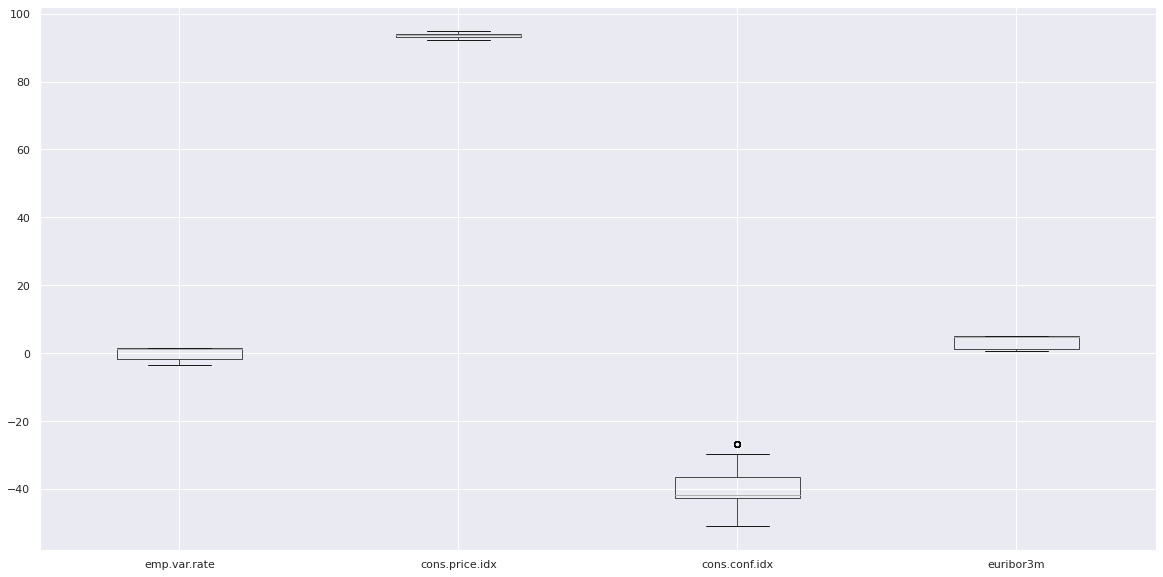

In [ ]:
plt.figure(figsize=(20,10))
claster_pd.boxplot()

In [ ]:
q1=claster_pd["cons.conf.idx"].quantile(0.25)
q3=claster_pd["cons.conf.idx"].quantile(0.75)
iqr=q3-q1
claster_pd=claster_pd.loc[(claster_pd["cons.conf.idx"]>q1-(1.5*iqr)) & (claster_pd["cons.conf.idx"]<q3+(1.5*iqr))]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
claster_pd=pd.DataFrame(scaler.fit_transform(claster_pd),columns=claster_pd.columns)

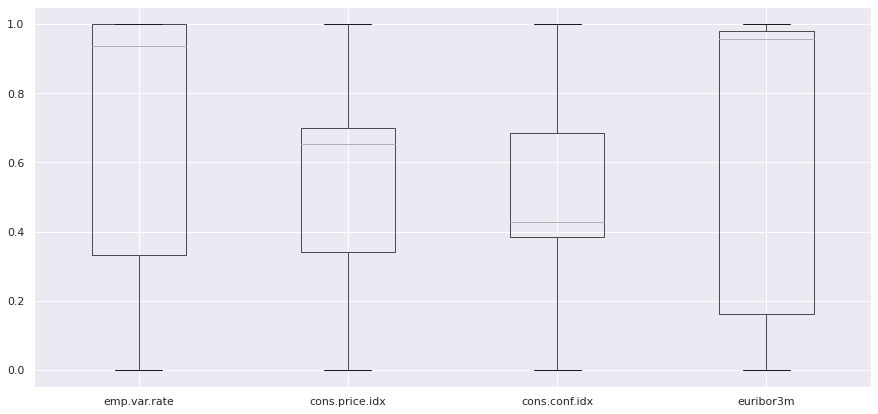

In [ ]:
plt.figure(figsize=(15,7))
claster_pd.boxplot()

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(claster_pd)
    cluster_labels = kmeans.labels_
    sse[k] = kmeans.inertia_

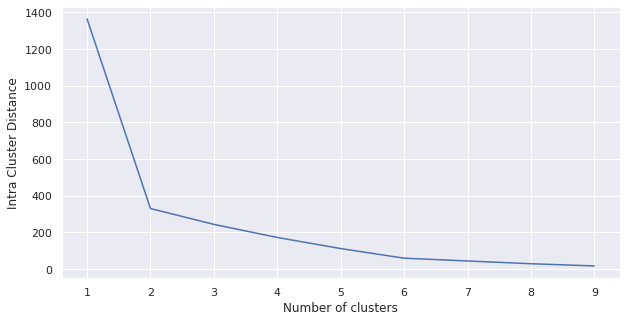

In [ ]:
plt.close()
plt.rcParams['figure.figsize']=[10,5]
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")

plt.show()

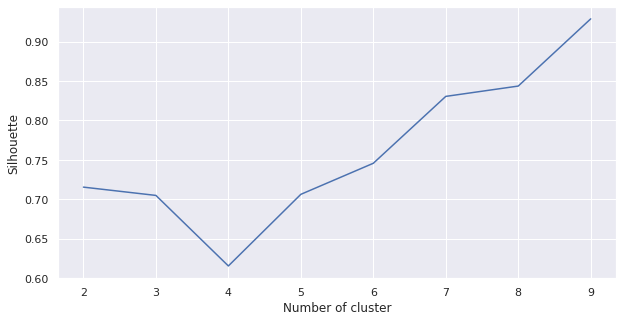

In [ ]:
from sklearn.metrics import silhouette_score
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(claster_pd)
    cluster_labels = kmeans.fit_predict(claster_pd)
    sse[k] = silhouette_score(claster_pd, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

In [ ]:
!pip install scikit-plot

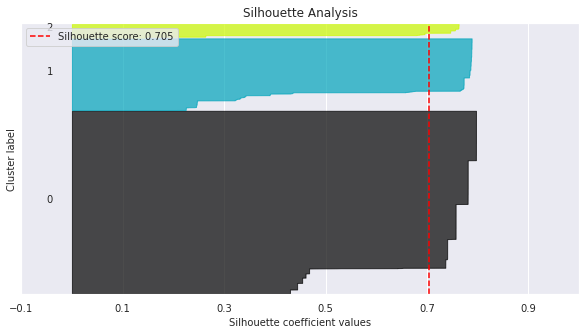

In [ ]:
import scikitplot as skplt
kmeans = KMeans(n_clusters=3, random_state=1)
cluster_labels = kmeans.fit_predict(claster_pd)
skplt.metrics.plot_silhouette(claster_pd, cluster_labels)
plt.show()

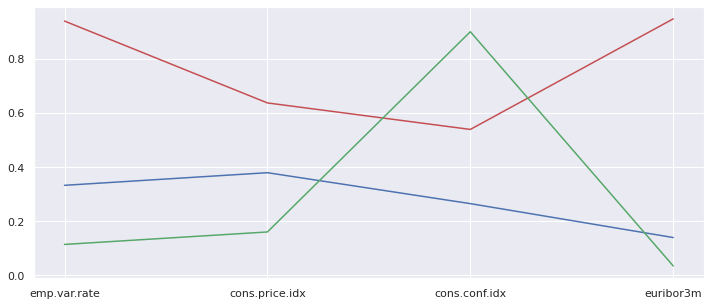

In [ ]:
centroids=kmeans.cluster_centers_
plt.close()
plt.rcParams['figure.figsize']=[12,5]
plt.plot(centroids[0,:], c = 'r')
plt.plot(centroids[1,:], c = 'b')
plt.plot(centroids[2,:], c = 'g')
plt.xticks(list(range(4)), claster_pd.columns)
plt.show()

In [ ]:
df_centroids=pd.DataFrame(centroids,columns=claster_pd.columns,index=["C1","C2","C3"])

In [ ]:
df_centroids

emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m
C1      0.938896        0.636392       0.538446   0.947049
C2      0.331923        0.378573       0.264304   0.138963
C3      0.113552        0.159593       0.899481   0.034002

**K-Prototype** algoritam klasterovanja za kategorijske i numericke vrednosti

In [ ]:
k_prot_df=pd.read_csv("./drive/MyDrive/ColabNotebooks/Dataset/Bank_pd/k_prototype.csv",index_col=0)

In [ ]:
q1=k_prot_df["age"].quantile(0.25)
q3=k_prot_df["age"].quantile(0.75)
iqr=q3-q1
k_prot_df=k_prot_df.loc[(k_prot_df["age"]>q1-(1.5*iqr)) & (k_prot_df["age"]<q3+(1.5*iqr))]

In [ ]:
k_prot_df.loan=k_prot_df.loan.replace({0:"No",1:"Yes"})
k_prot_df.housing=k_prot_df.housing.replace({0:"No",1:"Yes"})

In [ ]:
catColumnsPos = [k_prot_df.columns.get_loc(col) for col in list(k_prot_df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(k_prot_df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['housing', 'loan', 'job_lbl', 'education_lbl', 'marital']
Categorical columns position  : [1, 2, 3, 4, 5]


In [ ]:
scaler_age=MinMaxScaler()
scaler_age.fit(np.array(k_prot_df.age).reshape(-1,1))
age=scaler_age.transform(np.array(k_prot_df.age).reshape(-1,1))
k_prot_df.age=age

In [ ]:
dfMatrix = k_prot_df.to_numpy()

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
cost = []
for cluster in range(1, 10):
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)


Text(0, 0.5, 'Cost')

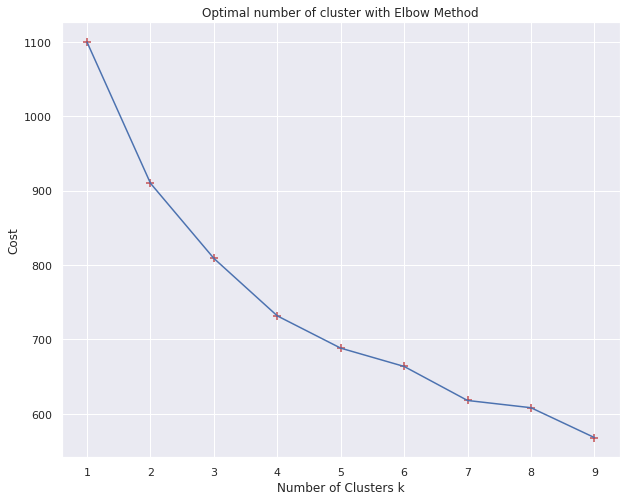

In [ ]:
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

plt.figure(figsize=(10,8))

plt.plot(df_cost["Cluster"],df_cost["Cost"])
plt.scatter(df_cost["Cluster"],df_cost["Cost"],marker="+",c="r",s=50)

plt.title('Optimal number of cluster with Elbow Method')
plt.xlabel('Number of Clusters k')
plt.ylabel('Cost')

In [ ]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 0, 0, ..., 0, 0, 2], dtype=uint16)

In [ ]:
print('Cluster centorid:{}'.format (kprototype.cluster_centroids_))

print('Iteracija kreiranih klastera :{}'.format(kprototype.n_iter_))

print('Cost kreiranih klastera:{}'.format(kprototype.cost_))

Cluster centorid:[['0.44402212166918215' 'No' 'No' 'admin.' 'high.school' 'married']
 ['0.3852840105114203' 'No' 'No' 'blue-collar' 'basic.9y' 'married']
 ['0.2732926342214878' 'Yes' 'No' 'technician' 'university.degree'
  'single']
 ['0.5921818636379864' 'Yes' 'No' 'admin.' 'university.degree' 'married']]
Iteracija kreiranih klastera :5
Cost kreiranih klastera:731.7484605539968


In [ ]:
centroids_df=pd.DataFrame(kprototype.cluster_centroids_,columns=k_prot_df.columns,index=["C1","C2","C3","C4"])

In [ ]:
centroids_df

age housing loan      job_lbl      education_lbl  marital
C1  0.44402212166918215      No   No       admin.        high.school  married
C2   0.3852840105114203      No   No  blue-collar           basic.9y  married
C3   0.2732926342214878     Yes   No   technician  university.degree   single
C4   0.5921818636379864     Yes   No       admin.  university.degree  married

In [ ]:

k_prot_df['Cluster'] = kprototype.labels_
k_prot_df['Cluster'] = k_prot_df['Cluster'].map({0:'C1', 1:'C2', 2:'C3',3:'C4'})

In [ ]:
  k_prot_df.head()

age housing loan      job_lbl      education_lbl  marital Cluster
0  0.235294     Yes   No  blue-collar           basic.9y  married      C2
1  0.411765      No   No     services        high.school   single      C1
2  0.137255     Yes   No     services        high.school  married      C1
3  0.392157      No   No     services           basic.9y  married      C2
4  0.568627     Yes   No       admin.  university.degree  married      C4

In [ ]:
df_final_cluster=pd.read_csv("./drive/MyDrive/ColabNotebooks/Dataset/Bank_pd/df_final_cluster.csv",index_col=0)

In [ ]:
df_predict=df_final_cluster.loc[:,["age","housing","loan","job_lbl","education_lbl","marital"]]

In [ ]:
df_predict.housing=df_predict.housing.map({0:"No",1:"Yes"})
df_predict.loan=df_predict.loan.map({0:"No",1:"Yes"})

In [ ]:
age=scaler_age.transform(np.array(df_predict.age).reshape(-1,1))
df_predict.age=age

In [ ]:
df_predict.head()

age housing loan      job_lbl      education_lbl  marital
0  0.235294     Yes   No  blue-collar           basic.9y  married
1  0.411765      No   No     services        high.school   single
2  0.137255     Yes   No     services        high.school  married
3  0.392157      No   No     services           basic.9y  married
4  0.568627     Yes   No       admin.  university.degree  married

In [ ]:
df_final_cluster["Cluster"]=kprototype.fit_predict(df_predict.to_numpy(), categorical = catColumnsPos)

In [ ]:
df_final_cluster["Cluster_lbl"]=df_final_cluster.Cluster.map({0:"C1",1:"C2",2:"C3",3:"C4"})

In [ ]:
df_final_cluster.head()

age  housing  loan  campaign  pdays  previous  emp.var.rate  \
0   30      1.0   0.0       2.0    999       0.0          -1.8   
1   39      0.0   0.0       4.0    999       0.0           1.1   
2   25      1.0   0.0       1.0    999       0.0           1.4   
3   38      0.0   0.0       3.0    999       0.0           1.4   
4   47      1.0   0.0       1.0    999       0.0          -0.1   

   cons.price.idx  cons.conf.idx  euribor3m    y      job_lbl  \
0          92.893          -46.2      1.313  0.0  blue-collar   
1          93.994          -36.4      4.855  0.0     services   
2          94.465          -41.8      4.962  0.0     services   
3          94.465          -41.8      4.959  0.0     services   
4          93.200          -42.0      4.191  0.0       admin.   

       education_lbl  marital  Cluster Cluster_lbl  
0           basic.9y  married        0          C1  
1        high.school   single        2          C3  
2        high.school  married        2          C3  
3           basic.9y  married        0          C1  
4  university.degree  married        3          C4

In [ ]:
df_c1=df_final_cluster.loc[df_final_cluster.Cluster==0]
df_c2=df_final_cluster.loc[df_final_cluster.Cluster==1]
df_c3=df_final_cluster.loc[df_final_cluster.Cluster==2]
df_c4=df_final_cluster.loc[df_final_cluster.Cluster==3]

In [ ]:
print('Cluster C1 \n',df_c1.job_lbl.value_counts())
print('\nCluster C2 \n',df_c2.job_lbl.value_counts())
print('\nCluster C3 \n',df_c3.job_lbl.value_counts())
print('\nCluster C4 \n',df_c4.job_lbl.value_counts())

Cluster C1 
 blue-collar      651
technician       162
admin.           136
management        70
self-employed     43
services          41
unemployed        40
entrepreneur      38
housemaid         36
retired           15
student            1
Name: job_lbl, dtype: int64

Cluster C2 
 admin.           603
technician       210
management        82
student           79
blue-collar       71
self-employed     53
entrepreneur      27
unemployed        26
services          23
housemaid         15
retired            3
Name: job_lbl, dtype: int64

Cluster C3 
 services         325
admin.           154
blue-collar       90
technician        73
management        44
entrepreneur      30
unemployed        27
housemaid         21
self-employed     20
retired           10
student            2
Name: job_lbl, dtype: int64

Cluster C4 
 technician       246
admin.           140
retired          138
management       128
blue-collar       84
entrepreneur      53
self-employed     43
housemaid         38


In [ ]:
print('Cluster C1 \n',df_c1.education_lbl.value_counts())
print('\nCluster C2 \n',df_c2.education_lbl.value_counts())
print('\nCluster C3 \n',df_c3.education_lbl.value_counts())
print('\nCluster C4 \n',df_c4.education_lbl.value_counts())

Cluster C1 
 basic.9y               436
basic.4y               186
professional.course    182
university.degree      152
basic.6y               140
high.school            136
illiterate               1
Name: education_lbl, dtype: int64

Cluster C2 
 university.degree      715
high.school            205
professional.course    149
basic.9y                69
basic.4y                29
basic.6y                25
Name: education_lbl, dtype: int64

Cluster C3 
 high.school            570
professional.course     71
basic.4y                58
basic.9y                47
basic.6y                45
university.degree        5
Name: education_lbl, dtype: int64

Cluster C4 
 university.degree      404
professional.course    176
basic.4y               160
basic.9y                59
high.school             52
basic.6y                41
Name: education_lbl, dtype: int64


In [ ]:
print('Cluster C1 \n',df_c1.marital.value_counts())
print('\nCluster C2 \n',df_c2.marital.value_counts())
print('\nCluster C3 \n',df_c3.marital.value_counts())
print('\nCluster C4 \n',df_c4.marital.value_counts())

Cluster C1 
 married     971
single      154
divorced    108
Name: marital, dtype: int64

Cluster C2 
 single      879
married     216
divorced     97
Name: marital, dtype: int64

Cluster C3 
 married     604
divorced    108
single       84
Name: marital, dtype: int64

Cluster C4 
 married     719
divorced    137
single       36
Name: marital, dtype: int64


In [ ]:
X_full_cluster=df_final_cluster.drop(columns=["pdays","previous","y","Cluster","Cluster_lbl"])
Y_full_cluster=df_final_cluster["y"]

X_c1=df_c1.drop(columns=["pdays","previous","y","Cluster","Cluster_lbl"])
Y_c1=df_c1["y"]

X_c2=df_c2.drop(columns=["pdays","previous","y","Cluster","Cluster_lbl"])
Y_c2=df_c2["y"]

X_c3=df_c3.drop(columns=["pdays","previous","y","Cluster","Cluster_lbl"])
Y_c3=df_c3["y"]

X_c4=df_c4.drop(columns=["pdays","previous","y","Cluster","Cluster_lbl"])
Y_c4=df_c4["y"]

In [ ]:
X_full_cluster=pd.get_dummies(X_full_cluster,columns=["job_lbl","education_lbl","marital"])

X_c1=pd.get_dummies(X_c1,columns=["job_lbl","education_lbl","marital"])

X_c2=pd.get_dummies(X_c2,columns=["job_lbl","education_lbl","marital"])

X_c3=pd.get_dummies(X_c3,columns=["job_lbl","education_lbl","marital"])

X_c4=pd.get_dummies(X_c4,columns=["job_lbl","education_lbl","marital"])

In [ ]:
X_full_cluster.head()

age  housing  loan  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   30      1.0   0.0       2.0          -1.8          92.893          -46.2   
1   39      0.0   0.0       4.0           1.1          93.994          -36.4   
2   25      1.0   0.0       1.0           1.4          94.465          -41.8   
3   38      0.0   0.0       3.0           1.4          94.465          -41.8   
4   47      1.0   0.0       1.0          -0.1          93.200          -42.0   

   euribor3m  job_lbl_admin.  job_lbl_blue-collar  job_lbl_entrepreneur  \
0      1.313               0                    1                     0   
1      4.855               0                    0                     0   
2      4.962               0                    0                     0   
3      4.959               0                    0                     0   
4      4.191               1                    0                     0   

   job_lbl_housemaid  job_lbl_management  job_lbl_retired  \
0                  0                   0                0   
1                  0                   0                0   
2                  0                   0                0   
3                  0                   0                0   
4                  0                   0                0   

   job_lbl_self-employed  job_lbl_services  job_lbl_student  \
0                      0                 0                0   
1                      0                 1                0   
2                      0                 1                0   
3                      0                 1                0   
4                      0                 0                0   

   job_lbl_technician  job_lbl_unemployed  education_lbl_basic.4y  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   education_lbl_basic.6y  education_lbl_basic.9y  education_lbl_high.school  \
0                       0                       1                          0   
1                       0                       0                          1   
2                       0                       0                          1   
3                       0                       1                          0   
4                       0                       0                          0   

   education_lbl_illiterate  education_lbl_professional.course  \
0                         0                                  0   
1                         0                                  0   
2                         0                                  0   
3                         0                                  0   
4                         0                                  0   

   education_lbl_university.degree  marital_divorced  marital_married  \
0                                0                 0                1   
1                                0                 0                0   
2                                0                 0                1   
3                                0                 0                1   
4                                1                 0                1   

   marital_single  
0               0  
1               1  
2               0  
3               0  
4               0

In [ ]:
from sklearn.model_selection import train_test_split

X_full_train,X_full_test,Y_full_train,Y_full_test=train_test_split(X_full_cluster,Y_full_cluster,test_size=0.3,random_state=69,stratify=Y_full_cluster)

X_c1_train,X_c1_test,Y_c1_train,Y_c1_test=train_test_split(X_c1,Y_c1,test_size=0.3,random_state=69,stratify=Y_c1)

X_c2_train,X_c2_test,Y_c2_train,Y_c2_test=train_test_split(X_c2,Y_c2,test_size=0.3,random_state=69,stratify=Y_c2)

X_c3_train,X_c3_test,Y_c3_train,Y_c3_test=train_test_split(X_c3,Y_c3,test_size=0.3,random_state=69,stratify=Y_c3)

X_c4_train,X_c4_test,Y_c4_train,Y_c4_test=train_test_split(X_c4,Y_c4,test_size=0.3,random_state=69,stratify=Y_c4)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
max_debth=[3,4,5,6,7]
min_samples=[10,15,20,25,30]
val_acc_rf=[]
models_rf=[]
for debth in max_debth:
  
  for leaf in min_samples:
    
    model_rf = RandomForestClassifier(criterion = "entropy",max_depth=debth,min_samples_leaf=leaf)
    pipe_rf_smt=Pipeline(steps = [('smote', SMOTE(sampling_strategy="minority",random_state=69)),
                                  ('random_forest', model_rf)])
    pipe_rf_smt.fit(X_full_train, Y_full_train)
    models_rf.append(model_rf)

    results_rf = cross_val_score(pipe_rf_smt, X_full_train, Y_full_train, cv=10, scoring='accuracy')
    val_acc_rf.append(round(np.mean(results_rf) * 100, 2))

In [ ]:
model_rf_full_claster=models_rf[val_acc_rf.index(max(val_acc_rf))]

In [ ]:
eval_train=[]
eval_test=[]

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4ad11210>)

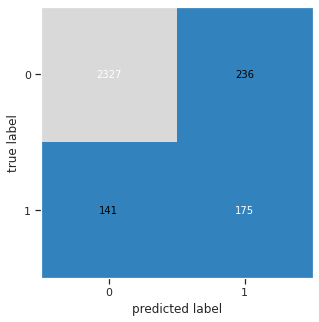

In [ ]:
y_hat = model_rf_full_claster.predict(X_full_train)
eval_train.append(precision_score(Y_full_train, y_hat))
eval_train.append(recall_score(Y_full_train, y_hat))
eval_train.append(accuracy_score(Y_full_train, y_hat))
eval_train.append(f1_score(Y_full_train, y_hat))
mat = confusion_matrix(Y_full_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b556598d0>)

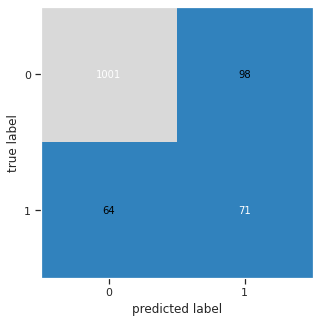

In [ ]:
y_hat = model_rf_full_claster.predict(X_full_test)
eval_test.append(precision_score(Y_full_test, y_hat))
eval_test.append(recall_score(Y_full_test, y_hat))
eval_test.append(accuracy_score(Y_full_test, y_hat))
eval_test.append(f1_score(Y_full_test, y_hat))
mat = confusion_matrix(Y_full_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
val_acc_rf=[]
models_rf=[]
for debth in max_debth:
  
  for leaf in min_samples:
    
    model_rf = RandomForestClassifier(criterion = "entropy",max_depth=debth,min_samples_leaf=leaf)
    pipe_rf_smt=Pipeline(steps = [('smote', SMOTE(sampling_strategy="minority",random_state=69)),
                                  ('random_forest', model_rf)])
    pipe_rf_smt.fit(X_c1_train, Y_c1_train)
    models_rf.append(model_rf)

    results_rf = cross_val_score(pipe_rf_smt, X_c1_train, Y_c1_train, cv=10, scoring='accuracy')
    val_acc_rf.append(round(np.mean(results_rf) * 100, 2))

In [ ]:
model_rf_c1_claster=models_rf[val_acc_rf.index(max(val_acc_rf))]

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4ada5510>)

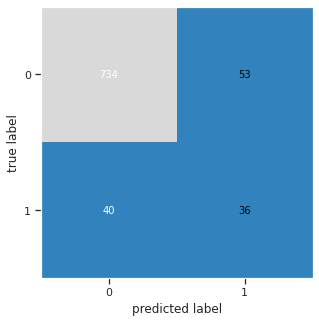

In [ ]:
y_hat = model_rf_c1_claster.predict(X_c1_train)
eval_train.append(precision_score(Y_c1_train, y_hat))
eval_train.append(recall_score(Y_c1_train, y_hat))
eval_train.append(accuracy_score(Y_c1_train, y_hat))
eval_train.append(f1_score(Y_c1_train, y_hat))
mat = confusion_matrix(Y_c1_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b555dc7d0>)

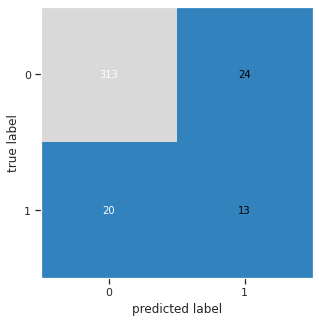

In [ ]:
y_hat = model_rf_c1_claster.predict(X_c1_test)
eval_test.append(precision_score(Y_c1_test, y_hat))
eval_test.append(recall_score(Y_c1_test, y_hat))
eval_test.append(accuracy_score(Y_c1_test, y_hat))
eval_test.append(f1_score(Y_c1_test, y_hat))
mat = confusion_matrix(Y_c1_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
val_acc_rf=[]
models_rf=[]
for debth in max_debth:
  
  for leaf in min_samples:
    
    model_rf = RandomForestClassifier(criterion = "entropy",max_depth=debth,min_samples_leaf=leaf)
    pipe_rf_smt=Pipeline(steps = [('smote', SMOTE(sampling_strategy="minority",random_state=69)),
                                  ('random_forest', model_rf)])
    pipe_rf_smt.fit(X_c2_train, Y_c2_train)
    models_rf.append(model_rf)

    results_rf = cross_val_score(pipe_rf_smt, X_c2_train, Y_c2_train, cv=10, scoring='accuracy')
    val_acc_rf.append(round(np.mean(results_rf) * 100, 2))

In [ ]:
model_rf_c2_claster=models_rf[val_acc_rf.index(max(val_acc_rf))]

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4ac44710>)

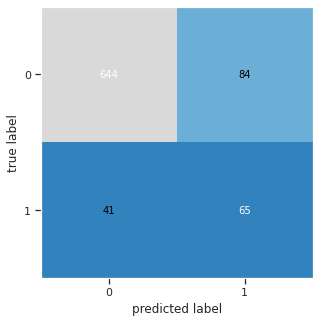

In [ ]:
y_hat = model_rf_c2_claster.predict(X_c2_train)
eval_train.append(precision_score(Y_c2_train, y_hat))
eval_train.append(recall_score(Y_c2_train, y_hat))
eval_train.append(accuracy_score(Y_c2_train, y_hat))
eval_train.append(f1_score(Y_c2_train, y_hat))
mat = confusion_matrix(Y_c2_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b55f78fd0>)

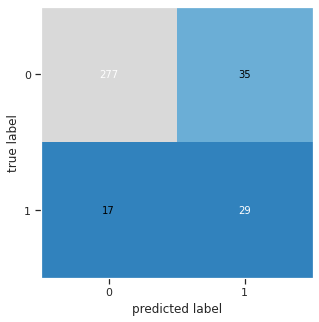

In [ ]:
y_hat = model_rf_c2_claster.predict(X_c2_test)
eval_test.append(precision_score(Y_c2_test, y_hat))
eval_test.append(recall_score(Y_c2_test, y_hat))
eval_test.append(accuracy_score(Y_c2_test, y_hat))
eval_test.append(f1_score(Y_c2_test, y_hat))
mat = confusion_matrix(Y_c2_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
val_acc_rf=[]
models_rf=[]
for debth in max_debth:
  
  for leaf in min_samples:
    
    model_rf = RandomForestClassifier(criterion = "entropy",max_depth=debth,min_samples_leaf=leaf)
    pipe_rf_smt=Pipeline(steps = [('smote', SMOTE(sampling_strategy="minority",random_state=69)),
                                  ('random_forest', model_rf)])
    pipe_rf_smt.fit(X_c3_train, Y_c3_train)
    models_rf.append(model_rf)

    results_rf = cross_val_score(pipe_rf_smt, X_c3_train, Y_c3_train, cv=10, scoring='accuracy')
    val_acc_rf.append(round(np.mean(results_rf) * 100, 2))

In [ ]:
model_rf_c3_claster=models_rf[val_acc_rf.index(max(val_acc_rf))]

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4ac11750>)

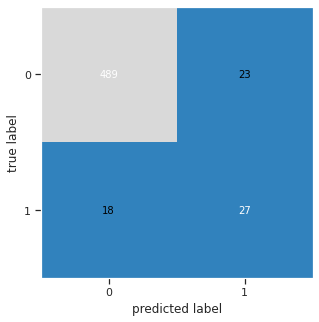

In [ ]:
y_hat = model_rf_c3_claster.predict(X_c3_train)
eval_train.append(precision_score(Y_c3_train, y_hat))
eval_train.append(recall_score(Y_c3_train, y_hat))
eval_train.append(accuracy_score(Y_c3_train, y_hat))
eval_train.append(f1_score(Y_c3_train, y_hat))
mat = confusion_matrix(Y_c3_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b552d0c10>)

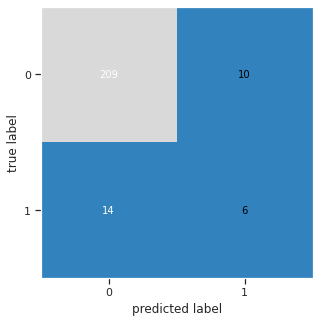

In [ ]:
y_hat = model_rf_c3_claster.predict(X_c3_test)
eval_test.append(precision_score(Y_c3_test, y_hat))
eval_test.append(recall_score(Y_c3_test, y_hat))
eval_test.append(accuracy_score(Y_c3_test, y_hat))
eval_test.append(f1_score(Y_c3_test, y_hat))
mat = confusion_matrix(Y_c3_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
val_acc_rf=[]
models_rf=[]
for debth in max_debth:
  
  for leaf in min_samples:
    
    model_rf = RandomForestClassifier(criterion = "entropy",max_depth=debth,min_samples_leaf=leaf)
    pipe_rf_smt=Pipeline(steps = [('smote', SMOTE(sampling_strategy="minority",random_state=69)),
                                  ('random_forest', model_rf)])
    pipe_rf_smt.fit(X_c4_train, Y_c4_train)
    models_rf.append(model_rf)

    results_rf = cross_val_score(pipe_rf_smt, X_c4_train, Y_c4_train, cv=10, scoring='accuracy')
    val_acc_rf.append(round(np.mean(results_rf) * 100, 2))

In [ ]:
model_rf_c4_claster=models_rf[val_acc_rf.index(max(val_acc_rf))]

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b4ab643d0>)

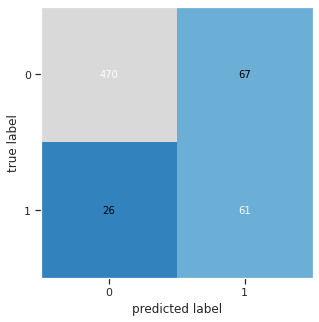

In [ ]:
y_hat = model_rf_c4_claster.predict(X_c4_train)
eval_train.append(precision_score(Y_c4_train, y_hat))
eval_train.append(recall_score(Y_c4_train, y_hat))
eval_train.append(accuracy_score(Y_c4_train, y_hat))
eval_train.append(f1_score(Y_c4_train, y_hat))
mat = confusion_matrix(Y_c4_train, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b55278990>)

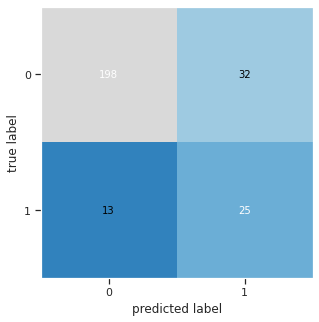

In [ ]:
y_hat = model_rf_c4_claster.predict(X_c4_test)
eval_test.append(precision_score(Y_c4_test, y_hat))
eval_test.append(recall_score(Y_c4_test, y_hat))
eval_test.append(accuracy_score(Y_c4_test, y_hat))
eval_test.append(f1_score(Y_c4_test, y_hat))
mat = confusion_matrix(Y_c4_test, y_hat)
plot_confusion_matrix(conf_mat=mat,figsize=(5,5),cmap="tab20c")

In [ ]:
df_cmp_clasters_train=pd.DataFrame(np.array(eval_train).reshape(-1,4),columns=["precision","recall","accuracy","f1"],index=["Full_dataset","C1","C2","C3","C4"])

In [ ]:
df_cmp_clasters_test=pd.DataFrame(np.array(eval_test).reshape(-1,4),columns=["precision","recall","accuracy","f1"],index=["Full_dataset","C1","C2","C3","C4"])

In [ ]:
expert_dec_coef_train=[len(X_c1_train)/len(X_full_train),len(X_c2_train)/len(X_full_train),len(X_c3_train)/len(X_full_train),len(X_c4_train)/len(X_full_train)]

In [ ]:
expert_dec_coef_train

[0.29975686002084057,
 0.28968391802709276,
 0.19346995484543245,
 0.21674192427926364]

In [ ]:
expert_mat_train=np.array(expert_dec_coef_train).reshape(1,-1)

In [ ]:
expert_decision_train=np.matmul(expert_mat_train,np.array(df_cmp_clasters_train.iloc[1:,:]))

In [ ]:
expert_decision_train

array([[0.45538699, 0.5876769 , 0.87738798, 0.51144583]])

In [ ]:
df_cmp_clasters_train=pd.concat([df_cmp_clasters_train,pd.DataFrame(expert_decision_train,columns=["precision","recall","accuracy","f1"],index=["Expert_Decision"])])

In [ ]:
df_cmp_clasters_train

precision    recall  accuracy        f1
Full_dataset      0.425791  0.553797  0.869052  0.481431
C1                0.404494  0.473684  0.892236  0.436364
C2                0.436242  0.613208  0.850120  0.509804
C3                0.540000  0.600000  0.926391  0.568421
C4                0.476562  0.701149  0.850962  0.567442
Expert_Decision   0.455387  0.587677  0.877388  0.511446

In [ ]:
expert_dec_coef_test=[len(X_c1_test)/len(X_full_test),len(X_c2_test)/len(X_full_test),len(X_c3_test)/len(X_full_test),len(X_c4_test)/len(X_full_test)]

expert_mat_test=np.array(expert_dec_coef_test).reshape(1,-1)

expert_decision_test=np.matmul(expert_mat_test,np.array(df_cmp_clasters_test.iloc[1:,:]))

df_cmp_clasters_test=pd.concat([df_cmp_clasters_test,pd.DataFrame(expert_decision_test,columns=["precision","recall","accuracy","f1"],index=["Expert_Decision"])])

In [ ]:
df_cmp_clasters_test

precision    recall  accuracy        f1
Full_dataset      0.420118  0.525926  0.868720  0.467105
C1                0.351351  0.393939  0.881081  0.371429
C2                0.453125  0.630435  0.854749  0.527273
C3                0.375000  0.300000  0.899582  0.333333
C4                0.438596  0.657895  0.832090  0.526316
Expert_Decision   0.404690  0.502001  0.867099  0.443202